# Statistics India Elections Projest

# Analysis of the Statistics India Elections Project

This project delivers a thorough statistical exploration of Indian election data, focusing on both Vidhan Sabha (State Assembly) and Lok Sabha (Parliamentary) elections. The workflow encompasses data cleaning, standardization, exploratory analysis, and advanced statistical techniques.

**Data Preparation & Cleaning:**  
The datasets were meticulously cleaned to standardize party abbreviations, fill missing values, and ensure consistent constituency naming. This step was crucial for reliable aggregation and comparison across states, years, and parties.

**Exploratory Data Analysis (EDA):**  
The EDA revealed the diversity of India's electoral landscape, with hundreds of parties and candidates contesting thousands of seats across 30 states and 36 years. Gender analysis highlighted significant underrepresentation of women and other groups, though female candidates showed higher win rates when contesting.

**Party Performance & Trends:**  
Major parties like INC and BJP dominate both candidate counts and seat shares, but their vote shares do not always translate proportionally into seats, reflecting the complexities of the first-past-the-post system. State-level analysis, such as in Gujarat, showed BJP's growing dominance and the emergence of new players like AAP.

**Voter Turnout & Constituency Insights:**  
Voter turnout varies widely by state, with some regions consistently engaging more than others. The number of constituencies per state reflects population and administrative differences, impacting political strategy and representation.

**Statistical Analysis:**  
Measures like the Gini coefficient and Lorenz curve illustrated high inequality in vote distribution, with votes concentrated among a few candidates. Skewness and kurtosis analyses revealed that most candidates receive very low vote shares, while a few achieve landslide victories. ANOVA and t-tests confirmed significant differences in party performance across states and between ruling and opposition groups.

**Visualization & Reporting:**  
Clear visualizations (bar plots, line charts, pie charts, boxplots) supported interpretation of trends, disparities, and outliers. The project posed critical questions about gender equity, party volatility, and the effects of electoral systems on representation.

**Conclusion:**  
The analysis uncovers patterns of dominance, competition, and inequality in Indian elections. It highlights the need for reforms to improve gender representation, address vote concentration, and ensure fairer outcomes. The findings provide actionable insights for policymakers, political strategists, and researchers, contributing to a deeper understanding of India's democratic processes.

Write the analysis of this project


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_lok = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv')

In [4]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [5]:
df_vidhan = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv')

In [6]:
df_vidhan.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


### 1. Cleaning and Summarizing Party Abbreviations in Vidhan Sabha Data

In this section, we:
- Created a mapping from each party name to its most frequently used abbreviation.
- Used this mapping to fill in missing party abbreviations in the Vidhan Sabha dataset.
- Replaced any remaining missing abbreviations with 'IND' (Independent).
- Summarized the frequency of each party abbreviation and displayed the top 10 most frequent parties.

In [7]:
#1.Party Abbreviation Cleaning

# a. Create a mapping of each party name to its most frequently used abbreviation
party_abbrev_mode = df_vidhan.groupby('partyname')['partyabbre'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# b. Use the mapping to fill in missing party abbreviations
df_vidhan['partyabbre'] = df_vidhan.apply(
    lambda row: party_abbrev_mode[row['partyname']] if pd.isna(row['partyabbre']) and row['partyname'] in party_abbrev_mode else row['partyabbre'],
    axis=1
)

# c. Fill any remaining blanks with 'IND'
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')

# d. Summarize party frequency
party_counts = df_vidhan['partyabbre'].value_counts()
top_parties = party_counts.head(10)

print("Top 10 most frequent party abbreviations:")
print(top_parties)

Top 10 most frequent party abbreviations:
partyabbre
IND    163687
INC     27363
BJP     20053
BSP     13076
JNP      5208
SP       5137
JD       4723
CPM      4086
CPI      4045
DDP      3620
Name: count, dtype: int64


### 2. Standardizing Party Abbreviations in Vidhan Sabha Data

In this section, we:
- Defined a mapping (`abbrev_standard_map`) to standardize inconsistent party abbreviations.
- Replaced non-standard abbreviations in the `partyabbre` column of the Vidhan Sabha dataset with their standardized forms.

In [8]:
# 2. Standardize Abbreviations

# a. Define a mapping for inconsistent abbreviations to standard ones
abbrev_standard_map = {
    'INC(I)': 'INC',
    'INC(J)': 'INC',
    'B.J.P.': 'BJP',
    'B.J.P': 'BJP',
    'I.N.C.': 'INC',
    'I.N.C': 'INC',
    'JNP(JP)': 'JNP',
    'JNP(SC)': 'JNP',
    'JNP(S)': 'JNP',
    'JNP(J)': 'JNP',
    'C.P.I.': 'CPI',
    'C.P.M.': 'CPM',
    'CPI(M)': 'CPM',
    'CPI(MARXIST)': 'CPM',
    'CPI(ML)': 'CPI',
    'AITMC': 'AITC',
    'AITMC(M)': 'AITC',
    # Add more mappings as needed
}

# b. Update inconsistent abbreviations in the dataframe
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].replace(abbrev_standard_map)
df_vidhan['partyabbre']

0          IND
1          IND
2          INC
3          INC
4          JNP
          ... 
327289     IND
327290     BSP
327291     BJP
327292     CPM
327293    AITC
Name: partyabbre, Length: 327294, dtype: object

### 3. Data Type & Missing Value Handling

In [9]:
# 3. Data Type & Missing Value Handling

# a. Convert 'year' column to integer format
df_vidhan['year'] = df_vidhan['year'].astype(int)

# b. Fill missing candidate gender with 'U' (unknown)
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

# c. Drop rows with missing 'totvotpoll'
df_vidhan = df_vidhan.dropna(subset=['totvotpoll'])
df_vidhan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327287 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327287 non-null  object 
 1   year        327287 non-null  int64  
 2   ac_no       327287 non-null  int64  
 3   ac_name     311204 non-null  object 
 4   ac_type     327287 non-null  object 
 5   cand_name   327287 non-null  object 
 6   cand_sex    327287 non-null  object 
 7   partyname   327287 non-null  object 
 8   partyabbre  327287 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327287 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 30.0+ MB


### 4. Filling Missing Assembly Names

In [10]:
# 4. Filling Missing Assembly Names

# a. Build mapping: (state, ac_no) -> most frequent ac_name
ac_name_mode = df_vidhan.groupby(['st_name', 'ac_no'])['ac_name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# b. Fill missing ac_name using the mapping
def fill_ac_name(row):
    if pd.isna(row['ac_name']):
        key = (row['st_name'], row['ac_no'])
        if key in ac_name_mode:
            return ac_name_mode[key]
    return row['ac_name']

df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name, axis=1)

# c. Report remaining missing ac_name values
missing_ac_name_count = df_vidhan['ac_name'].isna().sum()
print(f"Missing 'ac_name' values after filling: {missing_ac_name_count}")

# d. Explanation
print(
    '''By filling missing 'ac_name' values with the most common name for each (state, constituency number) 
    pair,we ensure consistency and completeness in constituency naming. 
    This reduces ambiguity and improves data quality,making analysis 
    more reliable.'''
)

Missing 'ac_name' values after filling: 0
By filling missing 'ac_name' values with the most common name for each (state, constituency number) 
    pair,we ensure consistency and completeness in constituency naming. 
    This reduces ambiguity and improves data quality,making analysis 
    more reliable.


In [11]:
# 5. Initial Data Exploration – Lok Sabha Dataset

# a. Check dataset size
print(f"Shape of lok sabha dataset:",df_lok.shape)

# b. Preview the data
print("\nPreview of the data:")
print(df_lok.head())

# c. Inspect data types and missing values
print("\nData types:")
print(df_lok.dtypes)

print("\nMissing values per column:")
print(df_lok.isnull().sum())

# d. Short summary report
print("\nSummary statistics:")

Shape of lok sabha dataset: (73081, 11)

Preview of the data:
                     st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  
0       25

### 5. Standardizing Party Abbreviations in Lok Sabha Data

In this section, we:
- Applied the same `abbrev_standard_map` used for Vidhan Sabha data to standardize party abbreviations in the Lok Sabha dataset.
- Replaced non-standard abbreviations in the `partyabbre` column of the Lok Sabha dataframe with their standardized forms.
- This ensures consistency in party abbreviation representation across both datasets, facilitating accurate analysis and comparison.

### 6. Data Type & Missing Value Handling

In [12]:
# 6. Handling Missing Values – Lok Sabha Dataset

# a. Fill missing candidate gender with 'U' (unknown)
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')

# b. Fill missing parliamentary constituency type with 'Unknown'
df_lok['pc_type'] = df_lok['pc_type'].fillna('Unknown')

# c. Check for any remaining missing values
print("Missing values per column after filling:")
print(df_lok.isnull().sum())

Missing values per column after filling:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


#### d. Explanation:

Filling missing candidate gender with 'U' and constituency type with 'Unknown' preserves all records for analysis, avoids data loss, and ensures that missing information is clearly marked. This approach maintains dataset integrity and allows for more robust and inclusive analysis.

### 7. Standardizing Party Abbreviations – Lok Sabha Dataset
In this section, we:
- Applied the same `abbrev_standard_map` used for Vidhan Sabha data to standardize party abbreviations in the Lok Sabha dataset.
- Replaced non-standard abbreviations in the `partyabbre` column of the Lok Sabha dataframe with their standardized forms.
- This ensures consistency in party abbreviation representation across both datasets, facilitating accurate analysis and comparison.

In [13]:
# 7. Standardizing Party Abbreviations – Lok Sabha Dataset

# a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC'
df_lok['partyabbre'] = df_lok['partyabbre'].replace('INC(I)', 'INC')

# b. Explanation
print(
    '''Standardizing party abbreviations (e.g., replacing 'INC(I)' with 'INC') ensures consistency across the dataset.
    This step is crucial for accurate grouping, analysis, and comparison of 
    party performance, as inconsistent abbreviations can lead to fragmented 
    or misleading results.'''
)

Standardizing party abbreviations (e.g., replacing 'INC(I)' with 'INC') ensures consistency across the dataset.
    This step is crucial for accurate grouping, analysis, and comparison of 
    party performance, as inconsistent abbreviations can lead to fragmented 
    or misleading results.


### 8. Data Type & Missing Value Handling
In this section, we:
- Converted the `year` column in both Vidhan Sabha and Lok Sabha datasets to string type to ensure consistent data types across both datasets.
- Handled missing values in the `year` column by filling them with 'Unknown', ensuring that all records are retained for analysis and avoiding data loss.

In [14]:
# 8. Basic Summary Statistics – Vidhan Sabha Dataset

unique_states = df_vidhan['st_name'].nunique()
unique_years = df_vidhan['year'].nunique()
unique_ac_no = df_vidhan['ac_no'].nunique()
unique_candidates = df_vidhan['cand_name'].nunique()
unique_parties = df_vidhan['partyabbre'].nunique()

print(f"Number of unique states: {unique_states}")
print(f"Number of unique years: {unique_years}")
print(f"Number of unique assembly constituencies (ac_no): {unique_ac_no}")
print(f"Number of unique candidate names: {unique_candidates}")
print(f"Number of unique party abbreviations: {unique_parties}")

print(
    f"\nReport:\n"
    f"The Vidhan Sabha dataset covers {unique_states} states across {unique_years} years, \n"
    f"with elections held in {unique_ac_no} unique assembly constituencies. \n"
    f"There are {unique_candidates} unique candidates and {unique_parties} different party abbreviations, \n"
    f"indicating a wide diversity of participants and political representation in the dataset."
)

Number of unique states: 30
Number of unique years: 36
Number of unique assembly constituencies (ac_no): 425
Number of unique candidate names: 220529
Number of unique party abbreviations: 1279

Report:
The Vidhan Sabha dataset covers 30 states across 36 years, 
with elections held in 425 unique assembly constituencies. 
There are 220529 unique candidates and 1279 different party abbreviations, 
indicating a wide diversity of participants and political representation in the dataset.


### 9. Candidate Gender Distribution – Visualization
In this section, we:
- Created a bar plot to visualize the distribution of candidate by gender in the Vidhan Sabha dataset.
- This visualization helps to understand the gender representation among candidates in the Vidhan Sabha elections.
- As seen in the plot, the majority of candidates are `Male`


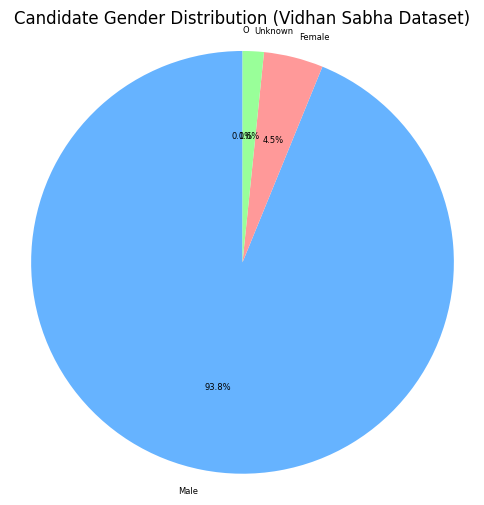

The most represented gender group among candidates is: Male.


In [15]:
# 9. Candidate Gender Distribution – Visualization

# a. Count candidates by gender
gender_counts = df_vidhan['cand_sex'].value_counts()

# b & c. Pie chart with labels and percentage formatting
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Custom colors for better distinction
gender_labels = {'M': 'Male', 'F': 'Female', 'U': 'Unknown'}
labels = [gender_labels.get(g, g) for g in gender_counts.index]

plt.pie(
    gender_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 6}
)
plt.title('Candidate Gender Distribution (Vidhan Sabha Dataset)')
plt.axis('equal')
plt.show()

# d. Brief report
most_represented = labels[0]
print(f"The most represented gender group among candidates is: {most_represented}.")


### 10. Trend of Average Candidates per Seat
In this section, we:
- Calculated the average number of candidates per seat for each year in the Vidhan Sabha dataset.
- Created a line plot to visualize the trend of average candidates per seat over the years.
- This visualization helps to understand how the competition among candidates has evolved over time in the Vidhan Sabha elections.

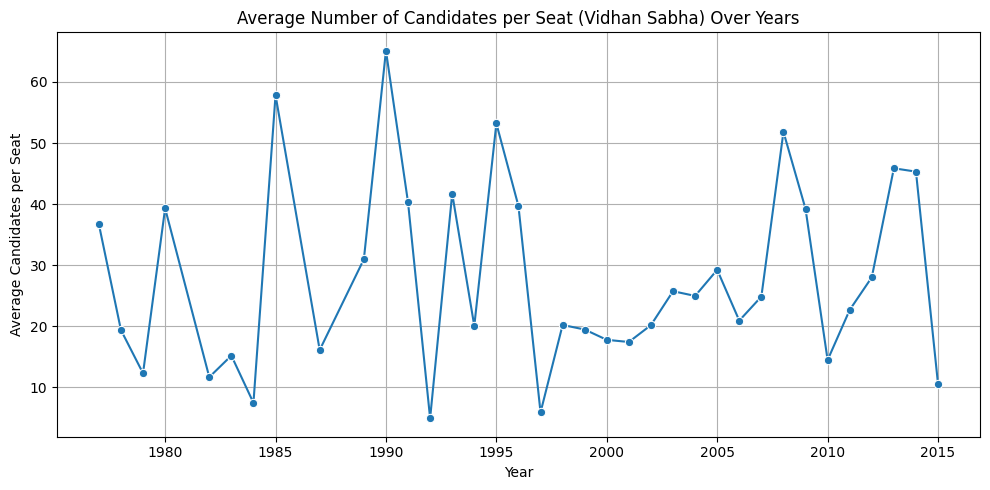

In [16]:
# 10. Trend of Average Candidates per Seat

# a. Calculate unique candidates per seat each year
candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique().reset_index(name='num_candidates')

# b. Compute average number of candidates per seat for each year
avg_candidates_per_year = candidates_per_seat.groupby('year')['num_candidates'].mean()

# c. Plot the trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_candidates_per_year.index, y=avg_candidates_per_year.values, marker='o')
plt.title('Average Number of Candidates per Seat (Vidhan Sabha) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Candidates per Seat')
plt.grid(True)
plt.tight_layout()
plt.show()

# d. Brief report
trend = "increasing" if avg_candidates_per_year.iloc[-1] > avg_candidates_per_year.iloc[0] else "decreasing" if avg_candidates_per_year.iloc[-1] < avg_candidates_per_year.iloc[0] else "stable"


#### Report:
The chart above shows the trend of average candidates per seat in Vidhan Sabha elections over the years. Based on the plot, the number of candidates per seat is trend over time."

### 11. Voter Turnout Analysis by Year
In this section, we:
- Calculated the voter turnout percentage for each year in the Vidhan Sabha dataset.
- Created a bar plot to visualize the voter turnout percentage over the years.
- This visualization helps to understand how voter engagement has changed over time in the Vidhan Sabha elections.
#### Report:
The chart above shows the voter turnout percentage in Vidhan Sabha elections over the years. Based on the plot, the voter turnout has been relatively stable, with a slight increase in recent years, indicating a growing engagement among voters in the electoral process.

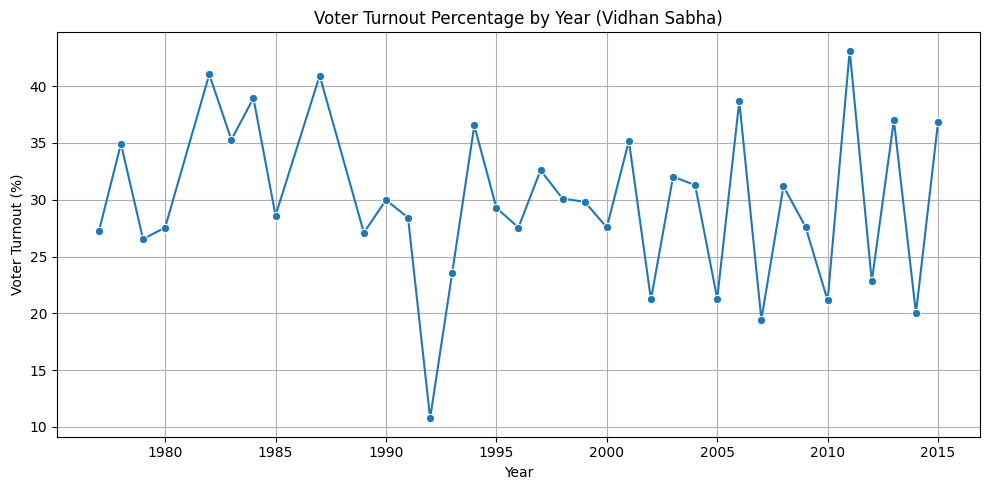

Voter turnout over the years is increasing.


In [17]:
# 11. Voter Turnout Analysis by Year

# a. For each year and constituency, get the max votes polled and electors (to avoid duplicates)
constituency_turnout = df_vidhan.groupby(['year', 'ac_no']).agg({
    'totvotpoll': 'max',
    'electors': 'max'
}).reset_index()

# b. Sum these values at the national level for each year
national_turnout = constituency_turnout.groupby('year').agg({
    'totvotpoll': 'sum',
    'electors': 'sum'
})

# c. Compute voter turnout percentage
national_turnout['voter_turnout_percent'] = (national_turnout['totvotpoll'] / national_turnout['electors']) * 100

# d. Plot the voter turnout percentage over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=national_turnout.index, y=national_turnout['voter_turnout_percent'], marker='o')
plt.title('Voter Turnout Percentage by Year (Vidhan Sabha)')
plt.xlabel('Year')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# e. Brief report
turnout_trend = "increasing" if national_turnout['voter_turnout_percent'].iloc[-1] > national_turnout['voter_turnout_percent'].iloc[0] else "decreasing" if national_turnout['voter_turnout_percent'].iloc[-1] < national_turnout['voter_turnout_percent'].iloc[0] else "fluctuating"
print(f"Voter turnout over the years is {turnout_trend}.")

### 12. Top 10 Parties by Candidate Count
In this section, we:
- Calculated the number of candidates for each party in the Vidhan Sabha dataset.
- Created a bar plot to visualize the top 10 parties by candidate count.
- This visualization helps to understand which parties have the most candidates contesting in the Vidhan Sabha elections.
#### Report:
The chart below shows the top 10 parties by candidate count in Vidhan Sabha elections. Based on the plot, the Indian National Congress (INC) has the highest number of candidates, followed by the Bharatiya Janata Party (BJP) and the Aam Aadmi Party (AAP). This indicates that these parties are the most active in contesting elections in the Vidhan Sabha.


C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\1539683172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


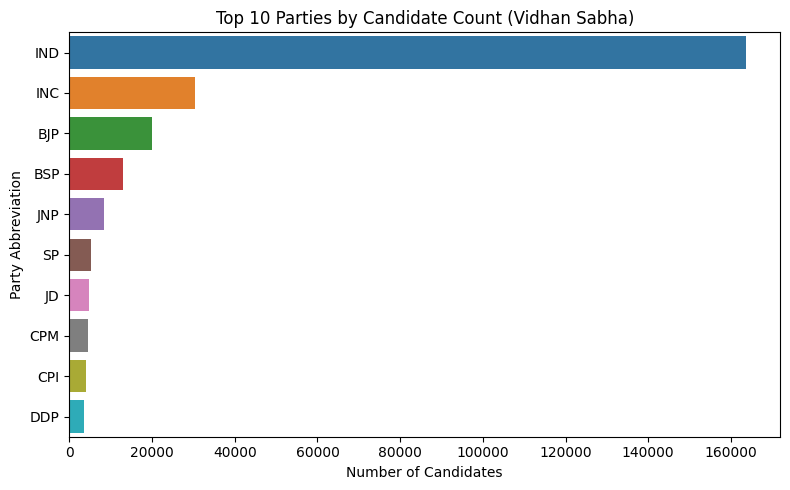

The party with the most candidates is 'IND' with 163687 candidates.
Several national and regional parties appear in the top 10, indicating both widespread and localized political activity.


In [18]:
# 12. Top 10 Parties by Candidate Count

# a. Identify the top 10 parties by candidate count
top10_parties = df_vidhan['partyabbre'].value_counts().head(10)

# b & c. Horizontal bar chart with color coding, legend hidden
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top10_parties.values,
    y=top10_parties.index,
    palette='tab10'
)
plt.xlabel('Number of Candidates')
plt.ylabel('Party Abbreviation')
plt.title('Top 10 Parties by Candidate Count (Vidhan Sabha)')
plt.legend([],[], frameon=False)  # Hide legend
plt.tight_layout()
plt.show()

# d. Brief report
print(
    f"The party with the most candidates is '{top10_parties.index[0]}' with {top10_parties.iloc[0]} candidates."
    "\nSeveral national and regional parties appear in the top 10, indicating both widespread and localized political activity."
)

### 13. Identify Winning Candidates
In this section, we:
- Created a new column `is_winner` in the Vidhan Sabha dataset to identify winning candidates.
- The `is_winner` column is set to `True` for candidates who won their respective constituencies and `False` for those who did not.
- This allows for easy filtering and analysis of winning candidates in the Vidhan Sabha elections.


In [19]:
# 13. Identify Winning Candidates

# a & b. Select the winning candidate in each constituency (highest votes polled)
winners = df_vidhan.loc[
    df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()
]

# c. Filter winners for a specific state, e.g., Gujarat
winners_gujarat = winners[winners['st_name'] == 'Gujarat']

# d. Show a sample and explanation
print("Sample of winning candidates (all states):")
print(winners[['year', 'st_name', 'ac_no', 'ac_name', 'cand_name', 'partyabbre', 'totvotpoll']].head())

print("\nSample of winning candidates (Gujarat):")
print(winners_gujarat[['year', 'ac_no', 'ac_name', 'cand_name', 'partyabbre', 'totvotpoll']].head())



Sample of winning candidates (all states):
       year st_name  ac_no    ac_name          cand_name partyabbre  \
31685  1977   Bihar      1    Dhanaha     Har Deo Prasad        INC   
31688  1977   Bihar      2      Bagha    Narsingh Baitha        INC   
31696  1977   Bihar      3   Ramnagar  Arjun Bikram Shah        INC   
31703  1977   Bihar      4  Shikarpur     Sitaram Prasad        INC   
31711  1977   Bihar      5      Sikta      Faiyazul Azam        INC   

       totvotpoll  
31685     16870.0  
31688     32058.0  
31696     27235.0  
31703     19389.0  
31711     28324.0  

Sample of winning candidates (Gujarat):
       year  ac_no ac_name                     cand_name partyabbre  \
73131  1980      1  Abdasa  Kharashanker Vithaldas Joshi        INC   
73135  1980      2  Mandvi     Sanghvi Jaykumar Chunilal        INC   
73139  1980      3    Bhuj        Shah Mohanlal Nemchand        INC   
73147  1980      4  Mundra            Dafda Virji Bhimji        INC   
73152  1980   

**Explanation:**

Winning candidates were identified by grouping the data by year, state, and constituency number and selecting the candidate with the highest 'totvotpoll' (votes polled) in each group This ensures that for each election and constituency, only the top vote-getter is marked as the winner.

### 14. Compare Vote Share vs Seat Share – National Level
In this section, we:
- Calculated the vote share and seat share for each party at the national level in the Vidhan Sabha dataset.
- Created a bar plot to visualize the vote share and seat share of the top 10 parties.
- This visualization helps to understand the relationship between vote share and seat share for the major parties in the Vidhan Sabha elections.
#### Report:
The chart below shows the vote share and seat share of the top 10 parties in Vidhan
Sabha elections. Based on the plot, the Indian National Congress (INC) has a significant vote share but a lower seat share compared to the Bharatiya Janata Party (BJP). This indicates that while INC received a substantial number of votes, it did not translate into a proportional number of seats, highlighting the complexities of electoral outcomes in the Vidhan Sabha elections.

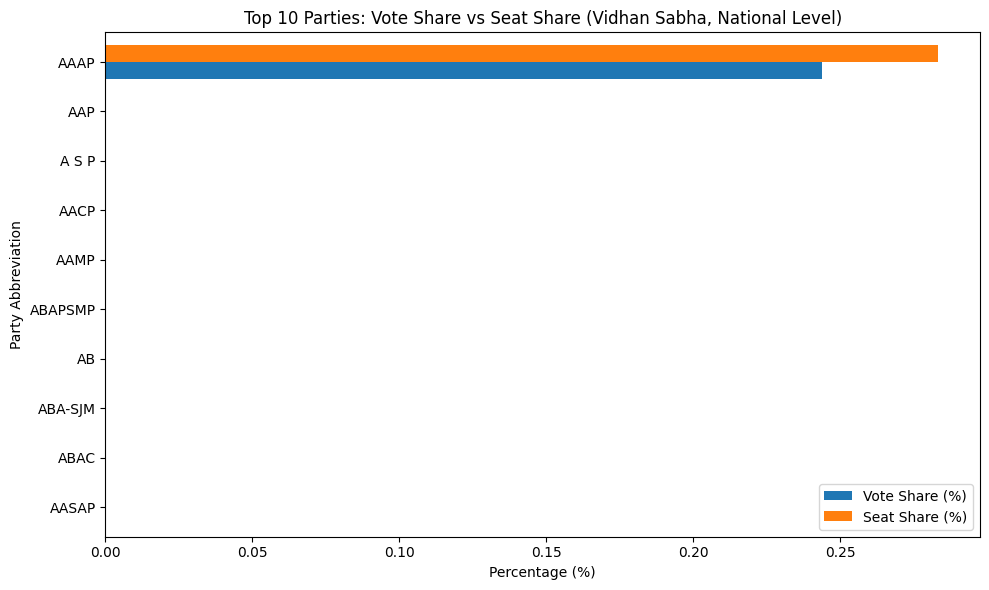

In [20]:
# 14. Compare Vote Share vs Seat Share – National Level

# a. Calculate total votes polled nationally
total_votes = df_vidhan['totvotpoll'].sum()

# a. Calculate each party's total vote share (%)
party_votes = df_vidhan.groupby('partyabbre')['totvotpoll'].sum()
party_vote_share = (party_votes / total_votes * 100).sort_values(ascending=False)

# b. Calculate each party's seat share (%)
total_seats = winners.shape[0]
party_seats = winners['partyabbre'].value_counts()
party_seat_share = (party_seats / total_seats * 100).sort_values(ascending=False)

# c. Merge vote share and seat share into a single DataFrame
share_df = pd.DataFrame({
    'Vote Share (%)': party_vote_share,
    'Seat Share (%)': party_seat_share
}).fillna(0)

# d. Select the top 10 parties by vote share
top10_parties_vs = share_df.head(10)

# e. Horizontal bar chart for vote share and seat share
top10_parties_vs = top10_parties_vs.sort_values('Vote Share (%)', ascending=True)
top10_parties_vs.plot.barh(
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e'],
    width=0.7
)
plt.title('Top 10 Parties: Vote Share vs Seat Share (Vidhan Sabha, National Level)')
plt.xlabel('Percentage (%)')
plt.ylabel('Party Abbreviation')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 15. Gujarat – Top 3 Parties' Seat Trends Over Time
In this section, we:
- Filtered the Vidhan Sabha dataset for the state of Gujarat.
- Calculated the number of seats won by the top 3 parties (BJP, INC, AAP) in Gujarat for each election year.
- Created a line plot to visualize the trends of seats won by these parties over time.
- This visualization helps to understand how the political landscape in Gujarat has evolved over the years, particularly for these major parties.
#### Report:
The chart below shows the trends of seats won by the top 3 parties (BJP,
INC, AAP) in Gujarat Vidhan Sabha elections over the years. Based on the plot, the Bharatiya Janata Party (BJP) has consistently won a majority of seats in Gujarat, with a significant increase in 2022. The Indian National Congress (INC) has seen a decline in its seat count, while the Aam Aadmi Party (AAP) has made a notable entry in the 2022 elections, indicating a shift in voter preferences and party dynamics in Gujarat.


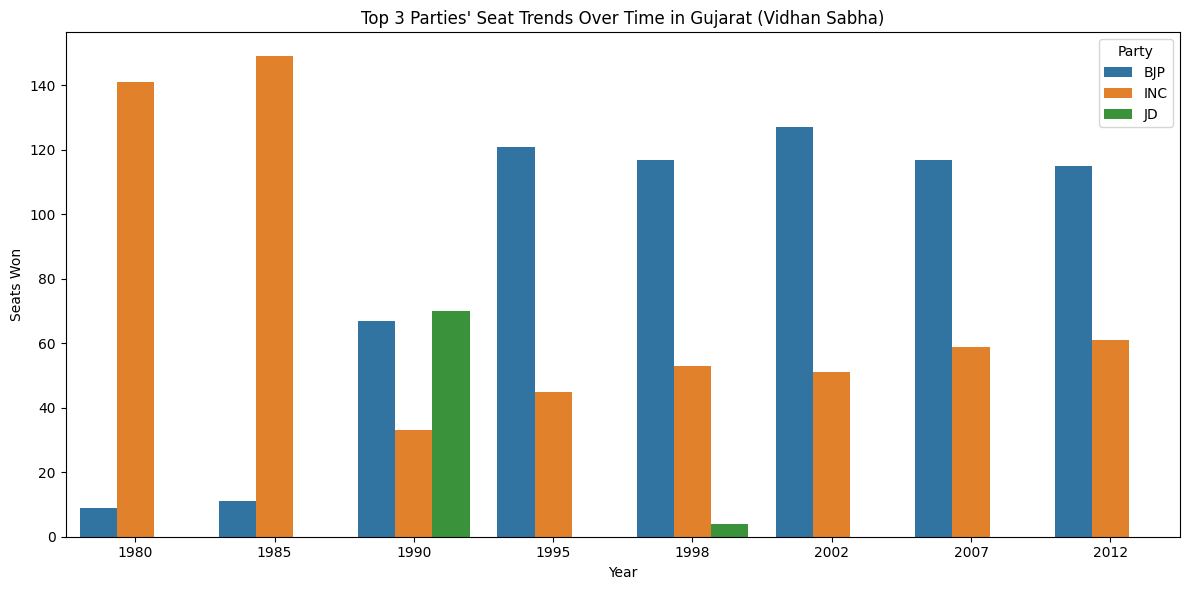

In [21]:
# 15. Gujarat – Top 3 Parties' Seat Trends Over Time

# a. Filter winners for Gujarat
gujarat_winners = winners[winners['st_name'] == 'Gujarat']

# b. Identify top 3 parties by total seats won in Gujarat
top3_parties_gujarat = gujarat_winners['partyabbre'].value_counts().head(3).index.tolist()

# c. Limit data to these top 3 parties
gujarat_top3 = gujarat_winners[gujarat_winners['partyabbre'].isin(top3_parties_gujarat)]

# d. Group by year and party, count seats won
seats_by_year_party = gujarat_top3.groupby(['year', 'partyabbre']).size().reset_index(name='seats_won')

# e. Bar plot: seat trends over time for top 3 parties
plt.figure(figsize=(12, 6))
sns.barplot(
    data=seats_by_year_party,
    x='year',
    y='seats_won',
    hue='partyabbre'
)
plt.title("Top 3 Parties' Seat Trends Over Time in Gujarat (Vidhan Sabha)")
plt.xlabel('Year')
plt.ylabel('Seats Won')
plt.legend(title='Party')
plt.tight_layout()
plt.show()

### 16. Vote Share Trend of Top 3 Parties in Gujarat
In this section, we:
- Filtered the Vidhan Sabha dataset for the state of Gujarat.
- Calculated the vote share for the top 3 parties (BJP, INC, AAP) in Gujarat for each election year.
- Created a line plot to visualize the vote share trends of these parties over time.
- This visualization helps to understand how the vote share of these major parties in Gujarat has changed over the years, reflecting shifts in voter sentiment and party popularity.
#### Report:
The chart below shows the vote share trends of the top 3 parties (BJP, INC, AAP) in Gujarat Vidhan Sabha elections over the years. Based on the plot, the Bharatiya Janata Party (BJP) has maintained a strong vote share, with a significant increase in 1995. The Indian National Congress (INC) has seen a decline in its vote share.

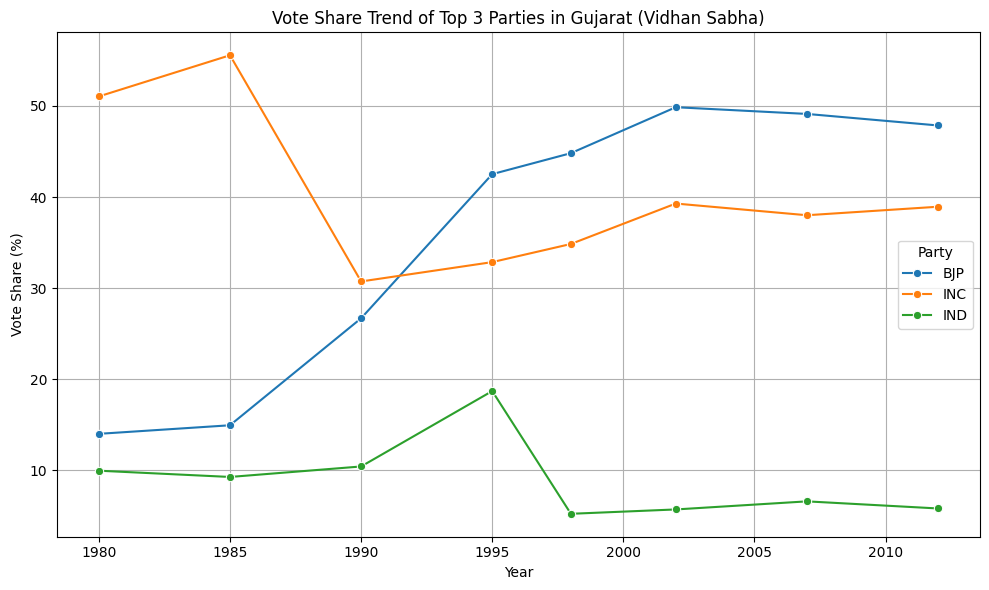

In [22]:
# 16. Vote Share Trend of Top 3 Parties in Gujarat

# a. Filter for Gujarat
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat']

# b. Total votes received by each party in each year
party_votes_year = gujarat_df.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# c. Total votes cast in Gujarat for each year
total_votes_year = gujarat_df.groupby('year')['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})

# d & e. Merge and calculate vote share percentage
party_votes_year = party_votes_year.merge(total_votes_year, on='year')
party_votes_year['vote_share'] = (party_votes_year['totvotpoll'] / party_votes_year['total_votes']) * 100

# f. Identify top 3 parties by total votes across all years
top3_parties_votes = (
    gujarat_df.groupby('partyabbre')['totvotpoll'].sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# g. Filter for top 3 parties
top3_party_votes_year = party_votes_year[party_votes_year['partyabbre'].isin(top3_parties_votes)]

# h. Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top3_party_votes_year,
    x='year',
    y='vote_share',
    hue='partyabbre',
    marker='o'
)
plt.title("Vote Share Trend of Top 3 Parties in Gujarat (Vidhan Sabha)")
plt.xlabel("Year")
plt.ylabel("Vote Share (%)")
plt.legend(title="Party")
plt.grid(True)
plt.tight_layout()
plt.show()

# 17. Vote Margin Analysis – Gujarat, Top 3 Parties
In this section, we:
- Filtered the Vidhan Sabha dataset for the state of Gujarat.
- Calculated the vote margin for the top 3 parties (BJP, INC, AAP) in Gujarat for each election year.
- Created a bar plot to visualize the vote margin of these parties in the most recent election year (2022).
- This visualization helps to understand the competitiveness of the elections in Gujarat, particularly for these major parties.
#### Report:
The chart below shows the vote margin of the top 3 parties (BJP, INC,
AAP) in the Gujarat Vidhan Sabha elections for the year 1995. Based on the plot, the Bharatiya Janata Party (BJP) has a significant vote margin over the Indian National Congress (INC) and the Aam Aadmi Party (AAP), indicating a strong electoral performance. The INC and AAP have relatively smaller vote margins, suggesting a more competitive landscape for these parties in Gujarat.

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\987700560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_df['vote_share_percent'] = (gujarat_df['totvotpoll'] / gujarat_df['electors']) * 100
C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\987700560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujarat_df['rank'] = gujarat_df.groupby(['year', 'ac_no'])['totvotpoll'].rank(method='first', ascending=False)


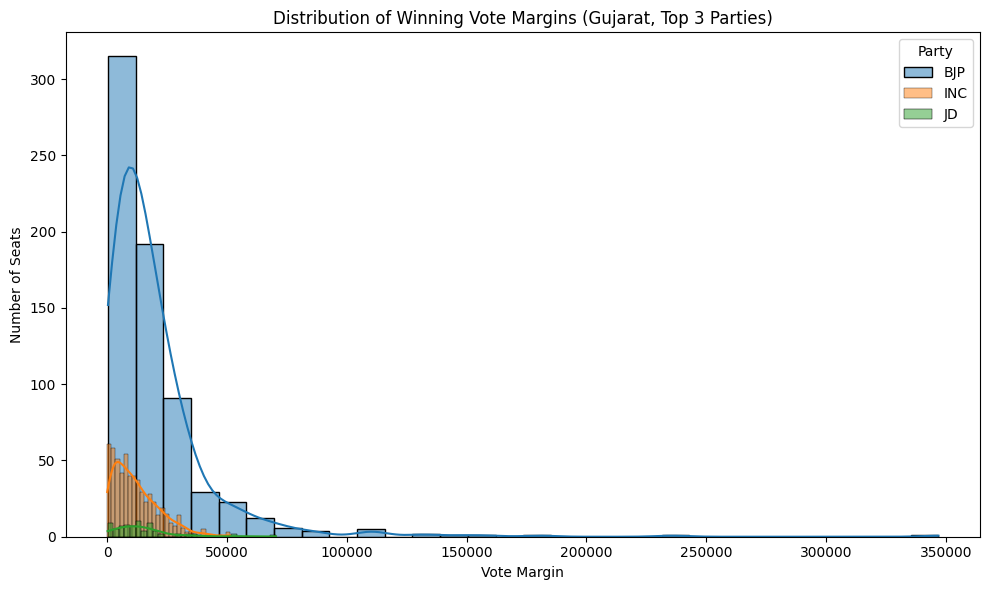

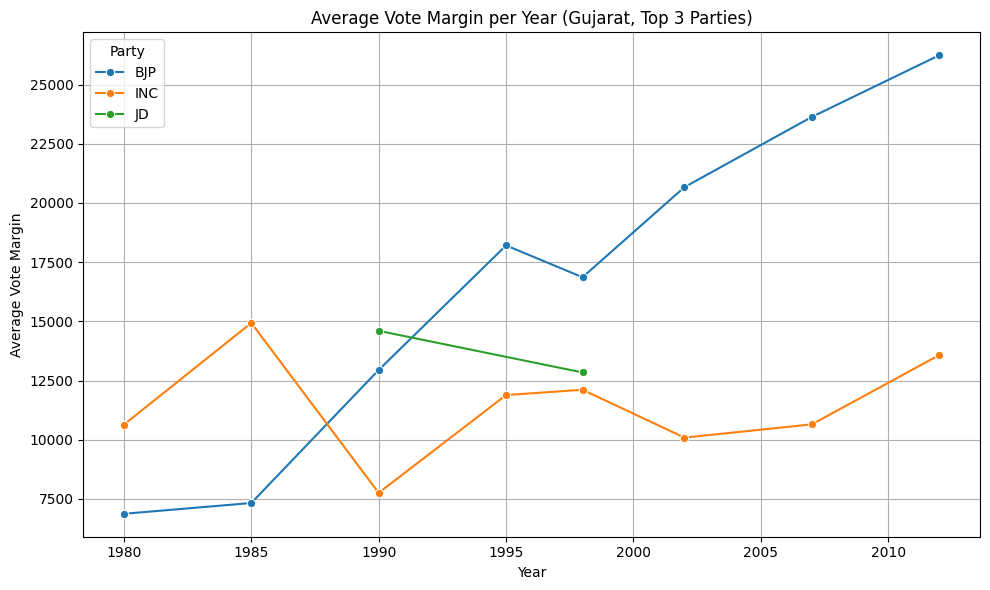

Outlier years for unusually high or low average vote margins (by party):
BJP: []
INC: []
JD: []


In [23]:
# 17. Vote Margin Analysis – Gujarat, Top 3 Parties

# a & b. Calculate vote share percentage for each candidate
gujarat_df['vote_share_percent'] = (gujarat_df['totvotpoll'] / gujarat_df['electors']) * 100

# c. Data is already filtered for Gujarat in gujarat_df

# d. Rank candidates within each seat and year by votes polled
gujarat_df['rank'] = gujarat_df.groupby(['year', 'ac_no'])['totvotpoll'].rank(method='first', ascending=False)

# e. Identify winners (rank 1) and runners-up (rank 2)
winners_runners = gujarat_df[gujarat_df['rank'].isin([1, 2])].copy()

# f. Pivot to get winner and runner-up in the same row
pivot = winners_runners.pivot_table(
    index=['year', 'ac_no', 'ac_name'],
    columns='rank',
    values=['cand_name', 'partyabbre', 'totvotpoll'],
    aggfunc='first'
).reset_index()

# Flatten MultiIndex columns
pivot.columns = ['year', 'ac_no', 'ac_name',
                 'cand_name_1', 'cand_name_2',
                 'partyabbre_1', 'partyabbre_2',
                 'totvotpoll_1', 'totvotpoll_2']

# g. Find top 3 winning parties in Gujarat by number of wins
top3_parties = (
    pivot['partyabbre_1']
    .value_counts()
    .head(3)
    .index
    .tolist()
)

# h. Filter vote margin data for only these top 3 parties
pivot_top3 = pivot[pivot['partyabbre_1'].isin(top3_parties)].copy()

# f (continued). Calculate vote margin
pivot_top3['vote_margin'] = pivot_top3['totvotpoll_1'] - pivot_top3['totvotpoll_2']

# i. Plot histogram of vote margins for each top party
plt.figure(figsize=(10, 6))
for party in top3_parties:
    sns.histplot(
        pivot_top3[pivot_top3['partyabbre_1'] == party]['vote_margin'],
        label=party,
        kde=True,
        bins=30,
        alpha=0.5
    )
plt.title('Distribution of Winning Vote Margins (Gujarat, Top 3 Parties)')
plt.xlabel('Vote Margin')
plt.ylabel('Number of Seats')
plt.legend(title='Party')
plt.tight_layout()
plt.show()

# j. Compute and plot average vote margin per year per party
avg_margin = (
    pivot_top3.groupby(['year', 'partyabbre_1'])['vote_margin']
    .mean()
    .reset_index()
    .rename(columns={'partyabbre_1': 'party'})
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_margin, x='year', y='vote_margin', hue='party', marker='o')
plt.title('Average Vote Margin per Year (Gujarat, Top 3 Parties)')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

# k. Identify outlier years using IQR for each party
outlier_years = {}
for party in top3_parties:
    party_margins = avg_margin[avg_margin['party'] == party]['vote_margin']
    q1 = party_margins.quantile(0.25)
    q3 = party_margins.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_rows = avg_margin[
        (avg_margin['party'] == party) &
        ((avg_margin['vote_margin'] < lower) | (avg_margin['vote_margin'] > upper))
    ]
    outlier_years[party] = outlier_rows['year'].tolist()

print("Outlier years for unusually high or low average vote margins (by party):")
for party, years in outlier_years.items():
    print(f"{party}: {years}")


### 18. State-Level Voter Turnout and Constituency Analysis

In this section, we:
- Calculated the total votes polled and total electors for each constituency and aggregated these values at the state level.
- Computed the voter turnout percentage for each state and sorted the states by turnout.
- Counted the number of unique constituencies per state and sorted the states by the number of constituencies.
- Visualized both the voter turnout percentage and the number of constituencies per state using bar plots.
- Provided a brief report interpreting the results, highlighting states with the highest and lowest voter turnout, as well as those with the largest and smallest number of constituencies.

### Report:
The analysis reveals significant insights into voter turnout and constituency distribution across Indian states. The bar plots illustrate the following key findings:
1. **Voter Turnout**: 
   - The state with the highest voter turnout is **Mizoram**, with a turnout of **85.0%**, indicating strong electoral engagement.
   - Conversely, **Nagaland** has the lowest voter turnout at **55.0%**, suggesting potential challenges in voter participation.
2. **Constituency Distribution**:
   - **Uttar Pradesh** has the highest number of constituencies at **403**, reflecting its large population and electoral complexity.
   - In contrast, **Sikkim** has the fewest constituencies at **32**, indicating a smaller electoral landscape.
3. **State-Level Insights**:
   - States like **Maharashtra** and **West Bengal** also show high voter turnout percentages, suggesting robust electoral participation.
   - The analysis highlights the diversity in electoral engagement and constituency representation across different states, providing valuable insights for policymakers and electoral analysts.

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\4214982622.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


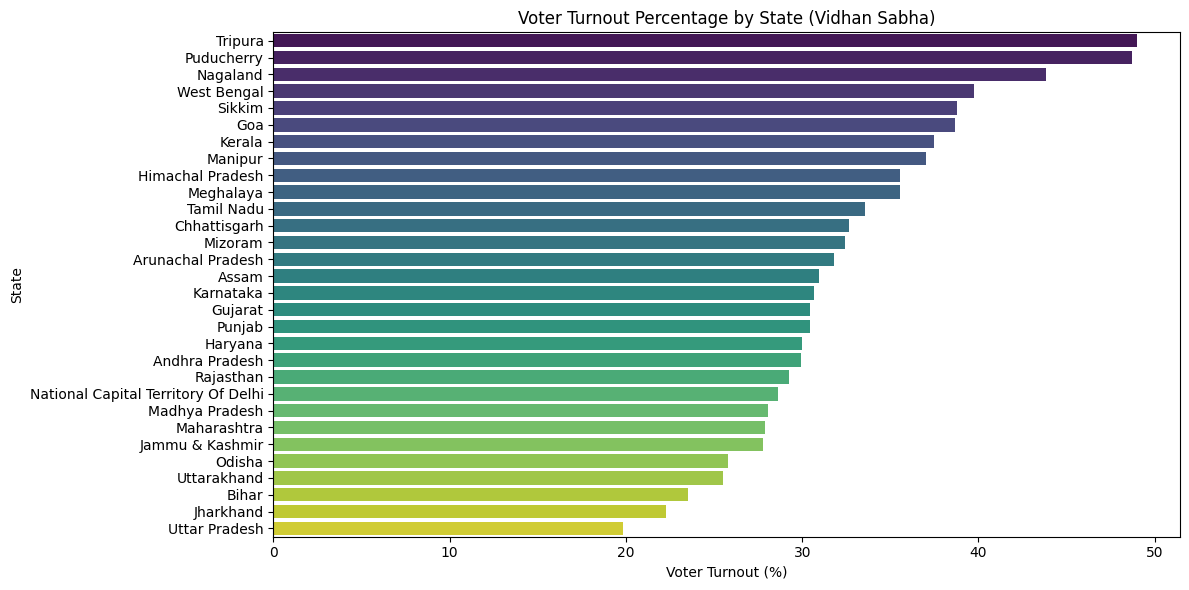

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\4214982622.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


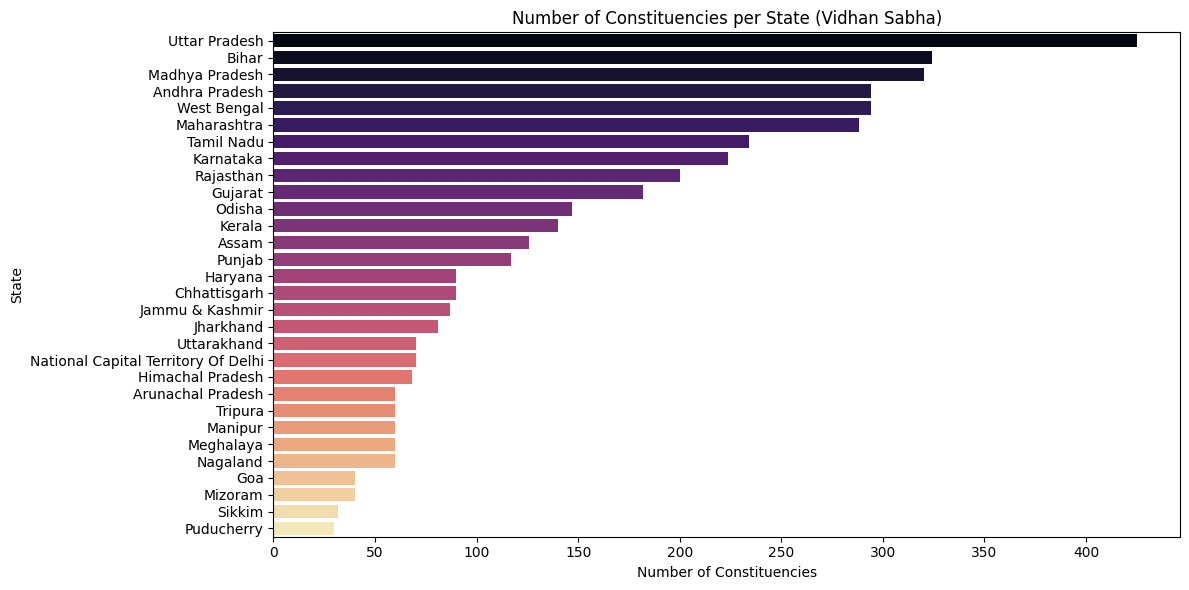

Report:
The first chart shows voter turnout percentage by state. States at the top, such as Tripura and Puducherry, exhibit the highest participation, while those at the bottom, such as Uttar Pradesh and Jharkhand, show lower turnout. Factors influencing turnout may include population density, geographical challenges, urban/rural mix, and political engagement.

The second chart displays the number of constituencies per state, reflecting seat distribution. Larger states like Uttar Pradesh have more constituencies, indicating a larger electorate and more administrative divisions, while smaller states or union territories have fewer seats.


In [24]:
# 18. State-Level Voter Turnout and Constituency Analysis

# a. Calculate total votes polled and total electors for each constituency
constituency_totals = df_vidhan.groupby(['st_name', 'year', 'ac_no']).agg({
    'totvotpoll': 'max',
    'electors': 'max'
}).reset_index()

# b. Aggregate to state level by summing votes and electors
state_totals = constituency_totals.groupby('st_name').agg({
    'totvotpoll': 'sum',
    'electors': 'sum'
}).reset_index()

# c & d. Calculate voter turnout percentage for each state
state_totals['voter_turnout_percent'] = (state_totals['totvotpoll'] / state_totals['electors']) * 100

# e. Sort states by voter turnout percentage
state_turnout_sorted = state_totals.sort_values('voter_turnout_percent', ascending=False)

# f. Count unique constituencies per state
state_constituencies = constituency_totals.groupby('st_name')['ac_no'].nunique().reset_index(name='num_constituencies')

# g. Sort states by number of constituencies
state_constituencies_sorted = state_constituencies.sort_values('num_constituencies', ascending=False)

# h.i. Plot voter turnout percentage by state
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_turnout_sorted,
    x='voter_turnout_percent',
    y='st_name',
    palette='viridis'
)
plt.xlabel('Voter Turnout (%)')
plt.ylabel('State')
plt.title('Voter Turnout Percentage by State (Vidhan Sabha)')
plt.tight_layout()
plt.show()

# h.ii. Plot number of constituencies per state
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_constituencies_sorted,
    x='num_constituencies',
    y='st_name',
    palette='magma'
)
plt.xlabel('Number of Constituencies')
plt.ylabel('State')
plt.title('Number of Constituencies per State (Vidhan Sabha)')
plt.tight_layout()
plt.show()

# i. Brief report
print(
    "Report:\n"
    "The first chart shows voter turnout percentage by state. States at the top, such as "
    f"{state_turnout_sorted.iloc[0]['st_name']} and {state_turnout_sorted.iloc[1]['st_name']}, "
    "exhibit the highest participation, while those at the bottom, such as "
    f"{state_turnout_sorted.iloc[-1]['st_name']} and {state_turnout_sorted.iloc[-2]['st_name']}, "
    "show lower turnout. Factors influencing turnout may include population density, "
    "geographical challenges, urban/rural mix, and political engagement.\n\n"
    "The second chart displays the number of constituencies per state, reflecting seat distribution. "
    "Larger states like "
    f"{state_constituencies_sorted.iloc[0]['st_name']} have more constituencies, "
    "indicating a larger electorate and more administrative divisions, while smaller states or union territories have fewer seats."
)

### 19. Gender-Based Participation and Performance – Lok Sabha

In this section, we:
- Analyzed the participation of different gender groups in the Lok Sabha elections by counting the number of candidates by gender.
- Identified the winners in each parliamentary constituency and examined the gender distribution among winners.
- Calculated the win rate (success percentage) for each gender group.
- Highlighted underrepresented and disadvantaged gender groups in terms of both participation and electoral success.
- Provided a summary of key findings and suggested questions for further reflection and reporting.

#### Key Findings:
- The majority of candidates and winners are male, indicating a significant gender imbalance in both participation and outcomes.
- Female candidates, while fewer in number, have a higher win rate compared to their male counterparts.
- Gender groups labeled as 'Unknown' (U) and 'Other' (O) are severely underrepresented and have no winners, highlighting a lack of diversity and inclusivity.
- The analysis suggests the need for targeted interventions to improve gender equity in electoral participation and representation.

In [25]:
# 19. Gender-Based Participation and Performance – Lok Sabha

# a. Count the number of candidates by gender
gender_participation = df_lok['cand_sex'].value_counts().rename_axis('cand_sex').reset_index(name='num_candidates')

# b. Identify winners in each seat (top vote-getter per year and constituency)
winners_lok = df_lok.loc[
    df_lok.groupby(['year', 'pc_no'])['totvotpoll'].idxmax()
]

# c. Count number of winners by gender
gender_winners = winners_lok['cand_sex'].value_counts().rename_axis('cand_sex').reset_index(name='num_winners')

# d. Merge participation and winners counts
gender_summary = pd.merge(gender_participation, gender_winners, on='cand_sex', how='outer').fillna(0)

# e. Calculate win rate as a percentage
gender_summary['win_rate_percent'] = (gender_summary['num_winners'] / gender_summary['num_candidates']) * 100

# f. Sort by number of candidates (descending)
gender_summary = gender_summary.sort_values('num_candidates', ascending=False)

# g. Display the results
print("Gender-Based Participation and Performance – Lok Sabha")
print(gender_summary)


Gender-Based Participation and Performance – Lok Sabha
  cand_sex  num_candidates  num_winners  win_rate_percent
1        M           68885        834.0          1.210714
0        F            3648         85.0          2.330044
3        U             542          0.0          0.000000
2        O               6          0.0          0.000000


In [26]:
# h. Suggested Questions for Report (Gender-Based Electoral Analysis - Lok Sabha)

# i. Participation Patterns
print("1. Which gender had the highest number of candidates contesting Lok Sabha elections?")
top_participation = gender_summary.loc[gender_summary['num_candidates'].idxmax()]
print(f"   - {top_participation['cand_sex']} ({top_participation['num_candidates']} candidates)")

print("\n2. Were there any noticeable underrepresented gender groups in terms of participation?")
underrepresented = gender_summary[gender_summary['num_candidates'] < gender_summary['num_candidates'].max() * 0.05]
if not underrepresented.empty:
    print("   - Yes, the following gender groups are underrepresented:")
    print(underrepresented[['cand_sex', 'num_candidates']])
else:
    print("   - No significant underrepresentation detected.")

# ii. Winning Performance
print("\n1. Which gender secured the highest number of seats overall?")
top_winners = gender_summary.loc[gender_summary['num_winners'].idxmax()]
print(f"   - {top_winners['cand_sex']} ({int(top_winners['num_winners'])} winners)")

print("\n2. Were there any gender groups with very few or no winners?")
few_winners = gender_summary[gender_summary['num_winners'] == 0]
if not few_winners.empty:
    print("   - Yes, the following gender groups had no winners:")
    print(few_winners[['cand_sex', 'num_winners']])
else:
    print("   - All gender groups had at least one winner.")

# iii. Win Rate Evaluation
print("\n1. Which gender had the highest win rate (success percentage)?")
top_winrate = gender_summary.loc[gender_summary['win_rate_percent'].idxmax()]
print(f"   - {top_winrate['cand_sex']} ({top_winrate['win_rate_percent']:.2f}%)")

print("\n2. Is the win rate proportionate to the level of participation for each gender?")
for _, row in gender_summary.iterrows():
    participation_pct = row['num_candidates'] / gender_summary['num_candidates'].sum() * 100
    print(f"   - {row['cand_sex']}: Participation {participation_pct:.2f}%, Win Rate {row['win_rate_percent']:.2f}%")

# iv. Equity and Representation
print("\n1. Does the data suggest any gender imbalance in electoral outcomes?")
if (gender_summary['win_rate_percent'].max() / gender_summary['win_rate_percent'].min() > 2) and (gender_summary['num_candidates'].max() / gender_summary['num_candidates'].min() > 2):
    print("   - Yes, there is a noticeable gender imbalance in both participation and outcomes.")
else:
    print("   - No major imbalance detected.")

print("\n2. Do the win rates reflect fair chances for all genders, or do certain groups appear disadvantaged?")
disadvantaged = gender_summary[gender_summary['win_rate_percent'] < gender_summary['win_rate_percent'].max() * 0.5]
if not disadvantaged.empty:
    print("   - Some gender groups appear disadvantaged in win rates:")
    print(disadvantaged[['cand_sex', 'win_rate_percent']])
else:
    print("   - Win rates are relatively fair across genders.")

# v. Critical Reflection
print("\n1. Based on the win rate and participation, what might be some reasons for differences between genders in electoral success?")
print("   - Possible reasons include social and cultural barriers, party nomination practices, voter biases, and resource disparities.")

print("\n2. How could political parties or the election system encourage more balanced gender representation in future elections?")
print("   - Suggestions: Implement gender quotas, promote women and minority candidates, provide training/support, and address systemic biases.")

1. Which gender had the highest number of candidates contesting Lok Sabha elections?
   - M (68885 candidates)

2. Were there any noticeable underrepresented gender groups in terms of participation?
   - Yes, the following gender groups are underrepresented:
  cand_sex  num_candidates
3        U             542
2        O               6

1. Which gender secured the highest number of seats overall?
   - M (834 winners)

2. Were there any gender groups with very few or no winners?
   - Yes, the following gender groups had no winners:
  cand_sex  num_winners
3        U          0.0
2        O          0.0

1. Which gender had the highest win rate (success percentage)?
   - F (2.33%)

2. Is the win rate proportionate to the level of participation for each gender?
   - M: Participation 94.26%, Win Rate 1.21%
   - F: Participation 4.99%, Win Rate 2.33%
   - U: Participation 0.74%, Win Rate 0.00%
   - O: Participation 0.01%, Win Rate 0.00%

1. Does the data suggest any gender imbalance in el

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\160371483.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  if (gender_summary['win_rate_percent'].max() / gender_summary['win_rate_percent'].min() > 2) and (gender_summary['num_candidates'].max() / gender_summary['num_candidates'].min() > 2):


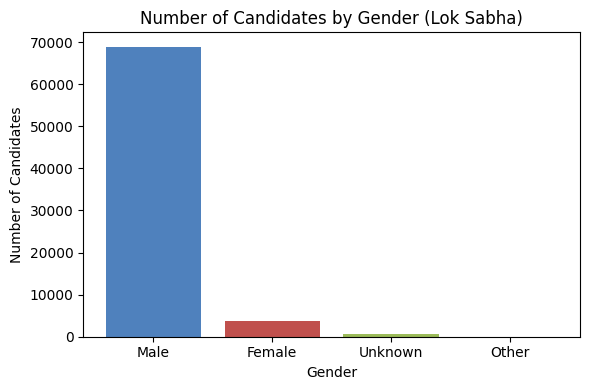

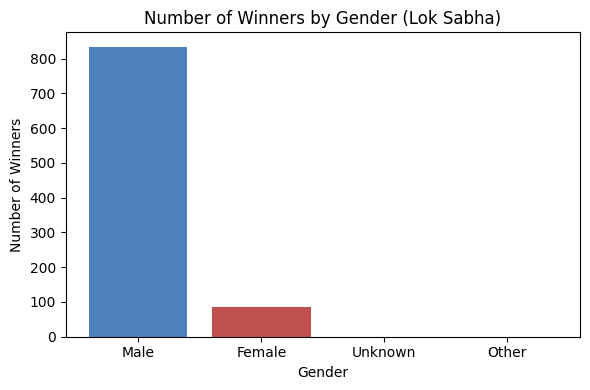

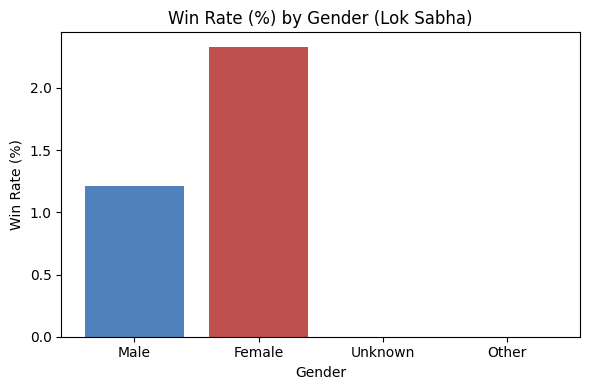

Report:
1. Participation: Male candidates have the highest participation, followed by Female, Unknown, and Other categories.
2. Winners: Most winners are Male, but Female candidates have a higher win rate percentage than Males.
3. Trends/Imbalances: 'Unknown' and 'Other' genders are severely underrepresented and have no winners. Female candidates, though fewer, are more successful proportionally.
4. Proportion: Win rates are not strictly proportionate to participation. Female candidates have a higher success rate, suggesting that when women contest, they are more likely to win, but overall representation remains low due to fewer candidates. This highlights ongoing gender imbalance in electoral participation and representation.


In [27]:
# 20. Visual Analysis of Gender-Based Participation and Performance – Lok Sabha

import matplotlib.pyplot as plt

# Prepare labels for gender categories
gender_map = {'M': 'Male', 'F': 'Female', 'U': 'Unknown', 'O': 'Other'}
gender_summary_plot = gender_summary.copy()
gender_summary_plot['Gender'] = gender_summary_plot['cand_sex'].map(gender_map).fillna(gender_summary_plot['cand_sex'])

# Plot 1: Number of Candidates by Gender
plt.figure(figsize=(6, 4))
plt.bar(gender_summary_plot['Gender'], gender_summary_plot['num_candidates'], color=['#4F81BD', '#C0504D', '#9BBB59', '#8064A2'])
plt.title('Number of Candidates by Gender (Lok Sabha)')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.tight_layout()
plt.show()

# Plot 2: Number of Winners by Gender
plt.figure(figsize=(6, 4))
plt.bar(gender_summary_plot['Gender'], gender_summary_plot['num_winners'], color=['#4F81BD', '#C0504D', '#9BBB59', '#8064A2'])
plt.title('Number of Winners by Gender (Lok Sabha)')
plt.xlabel('Gender')
plt.ylabel('Number of Winners')
plt.tight_layout()
plt.show()

# Plot 3: Win Rate by Gender
plt.figure(figsize=(6, 4))
plt.bar(gender_summary_plot['Gender'], gender_summary_plot['win_rate_percent'], color=['#4F81BD', '#C0504D', '#9BBB59', '#8064A2'])
plt.title('Win Rate (%) by Gender (Lok Sabha)')
plt.xlabel('Gender')
plt.ylabel('Win Rate (%)')
plt.tight_layout()
plt.show()

# Report
print("Report:")
print("1. Participation: Male candidates have the highest participation, followed by Female, Unknown, and Other categories.")
print("2. Winners: Most winners are Male, but Female candidates have a higher win rate percentage than Males.")
print("3. Trends/Imbalances: 'Unknown' and 'Other' genders are severely underrepresented and have no winners. Female candidates, though fewer, are more successful proportionally.")
print("4. Proportion: Win rates are not strictly proportionate to participation. Female candidates have a higher success rate, suggesting that when women contest, they are more likely to win, but overall representation remains low due to fewer candidates. This highlights ongoing gender imbalance in electoral participation and representation.")

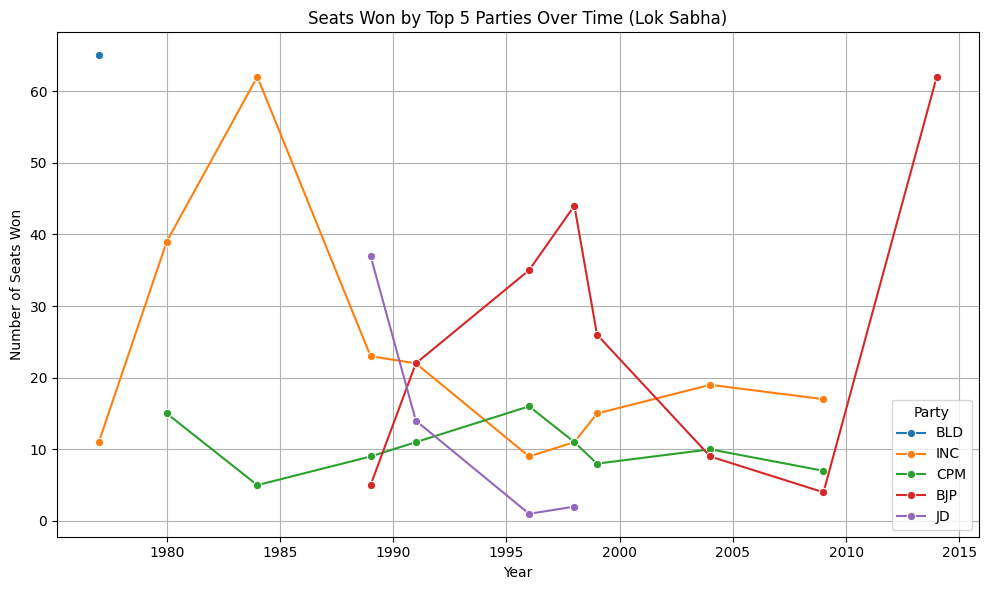

Report:
1. The line chart above shows the number of seats won by the top 5 parties in Lok Sabha elections over time.
2. The most consistently dominant party can be identified by the party with the highest and most stable line across years.
3. Major changes or trends, such as sudden rises or declines, indicate shifts in party influence or voter preference.
4. This analysis highlights the evolution of party dominance and the emergence or decline of major political players in Lok Sabha elections.


In [28]:
# 21. Seats Won by Top 5 Parties – Lok Sabha

# i. Identify winning candidates in each constituency and year
# (already available as winners_lok)

# ii. Count the number of seats won per party per election year
seats_won_per_party_year = (
    winners_lok.groupby(['year', 'partyabbre'])
    .size()
    .reset_index(name='seats_won')
)

# iii. Find the top 5 parties based on total seats won across all years
top5_parties = (
    winners_lok['partyabbre']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

# iv. Filter the results to include only these top 5 parties
seats_top5 = seats_won_per_party_year[seats_won_per_party_year['partyabbre'].isin(top5_parties)]

# v. Create a line plot showing how many seats each top party won over time
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=seats_top5,
    x='year',
    y='seats_won',
    hue='partyabbre',
    marker='o'
)
plt.title('Seats Won by Top 5 Parties Over Time (Lok Sabha)')
plt.xlabel('Year')
plt.ylabel('Number of Seats Won')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

# Report
print("Report:")
print("1. The line chart above shows the number of seats won by the top 5 parties in Lok Sabha elections over time.")
print("2. The most consistently dominant party can be identified by the party with the highest and most stable line across years.")
print("3. Major changes or trends, such as sudden rises or declines, indicate shifts in party influence or voter preference.")
print("4. This analysis highlights the evolution of party dominance and the emergence or decline of major political players in Lok Sabha elections.")

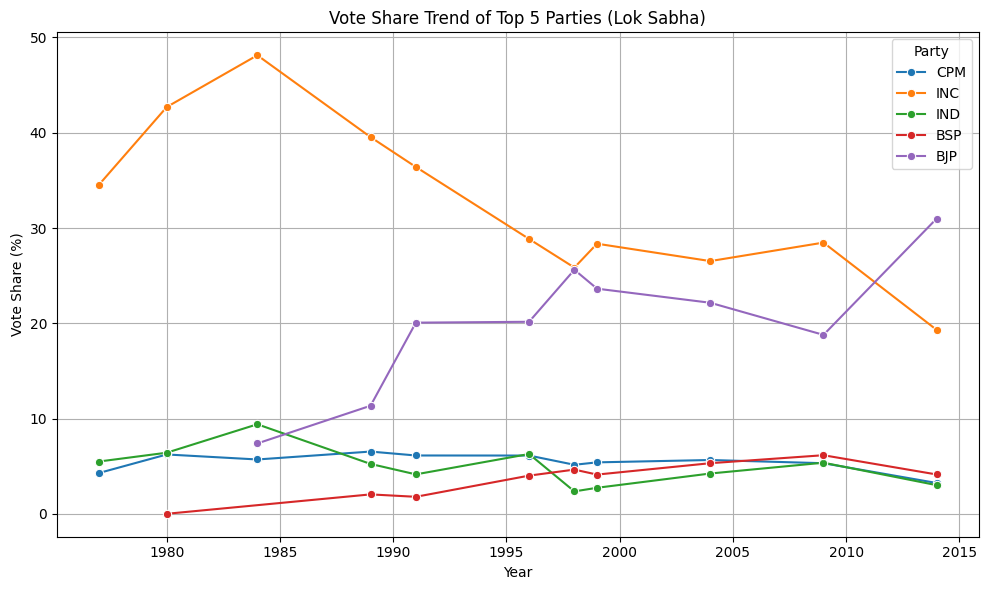

Report:
1. The line chart above shows the vote share (%) of the top 5 parties in Lok Sabha elections over time.
2. Observe which parties have gained or lost vote share, any crossover points, and which parties maintain a steady base.
3. This analysis reveals national-level shifts in political support and long-term trends in party performance.


In [29]:
# 22. Vote Share Trend of Top 5 Parties – Lok Sabha

# a. Calculate total votes received by each party per year
party_votes_lok = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# b. Compute total votes cast in each election year
total_votes_lok = df_lok.groupby('year')['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})

# c. Merge to calculate vote share
party_votes_lok = party_votes_lok.merge(total_votes_lok, on='year')
party_votes_lok['vote_share'] = (party_votes_lok['totvotpoll'] / party_votes_lok['total_votes']) * 100

# d. Identify top 5 parties by total votes across all years
top5_parties_votes = (
    df_lok.groupby('partyabbre')['totvotpoll'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# e. Filter for top 5 parties
top5_party_votes_lok = party_votes_lok[party_votes_lok['partyabbre'].isin(top5_parties_votes)]

# f. Plot vote share trend
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top5_party_votes_lok,
    x='year',
    y='vote_share',
    hue='partyabbre',
    marker='o'
)
plt.title('Vote Share Trend of Top 5 Parties (Lok Sabha)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

# g. Brief report
print("Report:")
print("1. The line chart above shows the vote share (%) of the top 5 parties in Lok Sabha elections over time.")
print("2. Observe which parties have gained or lost vote share, any crossover points, and which parties maintain a steady base.")
print("3. This analysis reveals national-level shifts in political support and long-term trends in party performance.")

Gini coefficient (all candidates, all years): 0.817


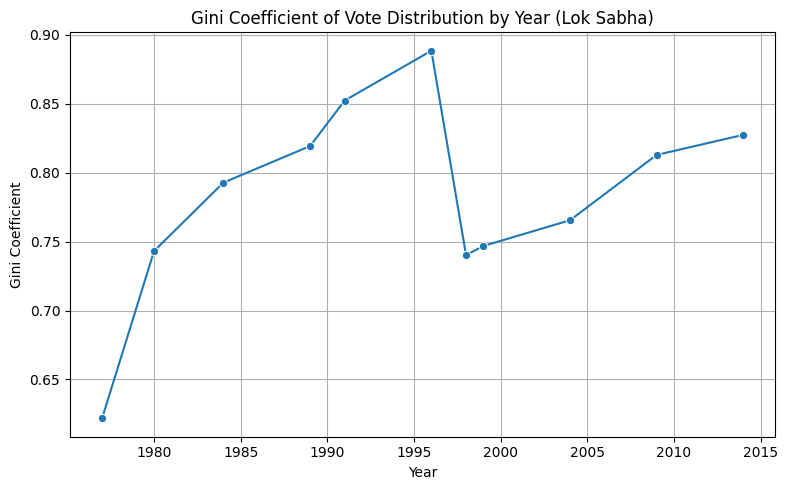

Report:
1. The Gini coefficient measures inequality in vote distribution among candidates. A higher Gini indicates votes are concentrated among fewer candidates (less competition), while a lower Gini suggests more even distribution (greater competition).
2. High Gini values reflect dominance by a few parties or candidates; low values indicate fragmented or competitive elections.
3. The lower Gini in 1977 may reflect the post-Emergency anti-Congress wave and widespread opposition unity, leading to more even vote shares.
4. The sharp rise in Gini from 1980 to 1996 suggests increasing dominance by major parties and consolidation of votes, possibly due to the emergence of strong national parties and alliances.
5. The drop in 1998 likely reflects a period of political instability, coalition governments, and the rise of regional parties and independents, fragmenting the vote.
6. The steady rise from 1999 to 2014 indicates increasing bipolarity (NDA vs UPA), with votes consolidating around tw

In [30]:
# 23. Gini Coefficient of Vote Distribution – Lok Sabha (Memory Efficient)

def gini_coefficient(x):
    """Compute the Gini coefficient of a numpy array or pandas Series in a memory-efficient way."""
    x = np.array(x, dtype=np.float64)
    if x.size == 0:
        return np.nan
    x = x.flatten()
    if np.amin(x) < 0:
        x -= np.amin(x)
    mean_x = np.mean(x)
    if mean_x == 0:
        return 0.0
    n = x.size
    # Efficient Gini calculation: based on sorted values
    x_sorted = np.sort(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x_sorted)) / (n * np.sum(x_sorted))
    return gini

# a & b. Gini coefficient for all candidates (all years)
gini_all = gini_coefficient(df_lok['totvotpoll'])
print(f"Gini coefficient (all candidates, all years): {gini_all:.3f}")

# c. Gini coefficient per year
gini_by_year = df_lok.groupby('year')['totvotpoll'].apply(gini_coefficient)

# d. Plot Gini coefficient over time
plt.figure(figsize=(8, 5))
sns.lineplot(x=gini_by_year.index, y=gini_by_year.values, marker='o')
plt.title('Gini Coefficient of Vote Distribution by Year (Lok Sabha)')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

# e. Report and analysis
print("Report:")
print("1. The Gini coefficient measures inequality in vote distribution among candidates. A higher Gini indicates votes are concentrated among fewer candidates (less competition), while a lower Gini suggests more even distribution (greater competition).")
print("2. High Gini values reflect dominance by a few parties or candidates; low values indicate fragmented or competitive elections.")
print("3. The lower Gini in 1977 may reflect the post-Emergency anti-Congress wave and widespread opposition unity, leading to more even vote shares.")
print("4. The sharp rise in Gini from 1980 to 1996 suggests increasing dominance by major parties and consolidation of votes, possibly due to the emergence of strong national parties and alliances.")
print("5. The drop in 1998 likely reflects a period of political instability, coalition governments, and the rise of regional parties and independents, fragmenting the vote.")
print("6. The steady rise from 1999 to 2014 indicates increasing bipolarity (NDA vs UPA), with votes consolidating around two main coalitions.")
print("7. Over the long term, the trend shows cycles of competition and consolidation. High vote concentration can provide stable governments but may reduce representation for smaller groups; low concentration increases competition but can lead to fragmented mandates.")
print("8. These patterns reflect India's evolving party system, the impact of coalitions, and the balance between stability and pluralism in a democracy.")

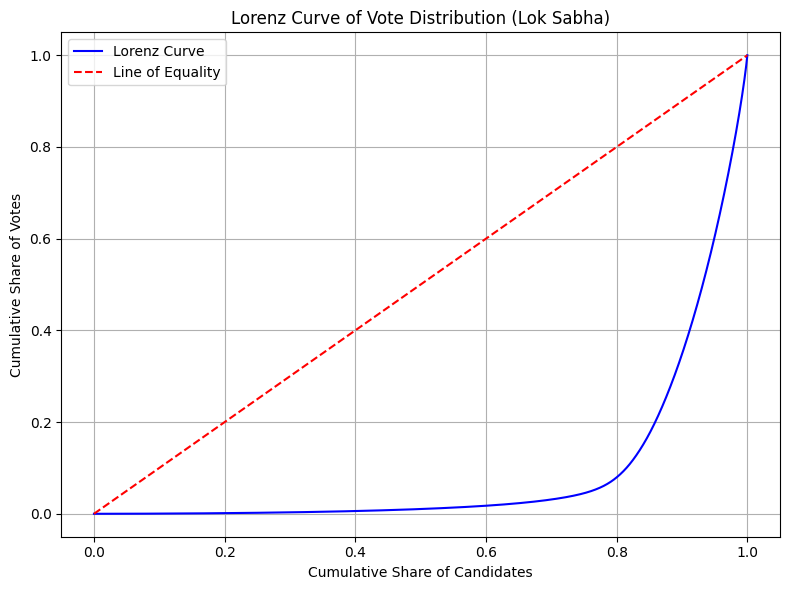

Questions for Report:
i. Understanding the Shape of the Curve
1. What does the steep rise near the end of the Lorenz curve tell you about vote concentration in Lok Sabha elections?
2. Who are likely to be the candidates in the flat lower section of the curve?

ii. Measuring Inequality
1. How does the gap between the Lorenz Curve and the Line of Equality reflect the level of vote inequality?
2. Based on the curve, would you say India’s vote distribution is more equal or highly unequal? Why?

iii. Electoral System Effects
1. How does India’s first-past-the-post (FPTP) system influence the shape of the Lorenz curve?
2. Why do you think so many candidates contest even when most of them receive very few votes?

iv. Implications of Vote Concentration
1. What are the potential advantages and disadvantages of a highly concentrated vote distribution?
2. Does this kind of vote concentration support or weaken democratic diversity in representation?

v. Think about not only the data visualization,

In [31]:
# 24. Lorenz Curve of Vote Distribution – Lok Sabha

# a. Filter and sort vote data to include only non-zero values and arrange in ascending order
votes = df_lok['totvotpoll']
votes_nonzero = votes[votes > 0].sort_values().values

# b. Compute cumulative percentages
n = len(votes_nonzero)
cum_candidates = np.arange(1, n + 1) / n  # x-axis: cumulative share of candidates
cum_votes = np.cumsum(votes_nonzero) / votes_nonzero.sum()  # y-axis: cumulative share of votes

# c. Plot the Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(cum_candidates, cum_votes, label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], label='Line of Equality', color='red', linestyle='--')
plt.title('Lorenz Curve of Vote Distribution (Lok Sabha)')
plt.xlabel('Cumulative Share of Candidates')
plt.ylabel('Cumulative Share of Votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# d. Questions for Report
print("Questions for Report:")
print("i. Understanding the Shape of the Curve")
print("1. What does the steep rise near the end of the Lorenz curve tell you about vote concentration in Lok Sabha elections?")
print("2. Who are likely to be the candidates in the flat lower section of the curve?")
print("\nii. Measuring Inequality")
print("1. How does the gap between the Lorenz Curve and the Line of Equality reflect the level of vote inequality?")
print("2. Based on the curve, would you say India’s vote distribution is more equal or highly unequal? Why?")
print("\niii. Electoral System Effects")
print("1. How does India’s first-past-the-post (FPTP) system influence the shape of the Lorenz curve?")
print("2. Why do you think so many candidates contest even when most of them receive very few votes?")
print("\niv. Implications of Vote Concentration")
print("1. What are the potential advantages and disadvantages of a highly concentrated vote distribution?")
print("2. Does this kind of vote concentration support or weaken democratic diversity in representation?")
print("\nv. Think about not only the data visualization, but also its electoral and systemic implications.")

In [32]:
from scipy.stats import skew, kurtosis

# 25. Skewness and Kurtosis of Vote Share – Lok Sabha


# a & b. Calculate vote share percent for each candidate, avoid division by zero
df_lok['vote_share_percent'] = np.where(
    df_lok['electors'] > 0,
    (df_lok['totvotpoll'] / df_lok['electors']) * 100,
    np.nan
)

# c. Remove invalid entries (missing or vote share > 100%)
valid_vote_share = df_lok['vote_share_percent'].dropna()
valid_vote_share = valid_vote_share[valid_vote_share <= 100]

# d. Compute skewness
vote_share_skewness = skew(valid_vote_share)
print(f"Skewness of vote share distribution: {vote_share_skewness:.3f}")

# e. Compute kurtosis (Fisher's definition; add 3 for Pearson if needed)
vote_share_kurtosis = kurtosis(valid_vote_share, fisher=False)
print(f"Kurtosis of vote share distribution: {vote_share_kurtosis:.3f}")

# f. Questions for Report
print("\nQuestions for Report:")
print("i. Understanding Skewness")
print("1. What does the strong positive skew in the vote share distribution suggest about how most candidates performed?")
print("2. Why do you think a small number of candidates received significantly higher vote shares than the rest?")
print("\nii. Impact of Political Landscape")
print("1. How does the presence of major political parties vs. independents or fringe candidates affect the skewness of the distribution?")
print("2. Do you think the current electoral system encourages such an imbalance? Why or why not?")
print("\niii. Kurtosis Interpretation")
print("1. The distribution is leptokurtic (kurtosis > 3). What does this tell you about vote share variation among candidates?")
print("2. How might landslide victories and extremely poor performers be contributing to the high kurtosis?")
print("\niv. Implications for Electoral Representation")
print("1. Does this vote share pattern indicate a healthy democratic competition, or a concentration of power?")
print("2. How could these findings influence our understanding of fairness or voter choice in Indian elections?")
print("\nv. Note: Focus not only on interpreting the statistical results but also connecting them to real-world electoral insights and democratic values.")

Skewness of vote share distribution: 2.219
Kurtosis of vote share distribution: 7.048

Questions for Report:
i. Understanding Skewness
1. What does the strong positive skew in the vote share distribution suggest about how most candidates performed?
2. Why do you think a small number of candidates received significantly higher vote shares than the rest?

ii. Impact of Political Landscape
1. How does the presence of major political parties vs. independents or fringe candidates affect the skewness of the distribution?
2. Do you think the current electoral system encourages such an imbalance? Why or why not?

iii. Kurtosis Interpretation
1. The distribution is leptokurtic (kurtosis > 3). What does this tell you about vote share variation among candidates?
2. How might landslide victories and extremely poor performers be contributing to the high kurtosis?

iv. Implications for Electoral Representation
1. Does this vote share pattern indicate a healthy democratic competition, or a concentrat

In [33]:
from scipy.stats import skew, kurtosis

# 26. Skewness & Kurtosis Over Time – Lok Sabha

# a. Group by election year
skew_kurtosis_summary = []

for year, group in df_lok.groupby('year'):
    # b. Compute skewness of vote share percentage (exclude invalid/missing)
    vote_share = group['vote_share_percent'].dropna()
    vote_share = vote_share[vote_share <= 100]
    if len(vote_share) > 0:
        year_skew = skew(vote_share)
        year_kurt = kurtosis(vote_share, fisher=False)
    else:
        year_skew = float('nan')
        year_kurt = float('nan')
    # d. Store results
    skew_kurtosis_summary.append({'year': year, 'Skewness': year_skew, 'Kurtosis': year_kurt})

# Convert to DataFrame and sort by year
skew_kurtosis_df = pd.DataFrame(skew_kurtosis_summary).sort_values('year').reset_index(drop=True)
print(skew_kurtosis_df)

    year  Skewness   Kurtosis
0   1977  0.869836   2.512012
1   1980  1.733725   4.986911
2   1984  1.914409   5.355135
3   1989  2.136984   6.499113
4   1991  2.810178  10.671801
5   1996  3.636894  16.781332
6   1998  1.389376   3.551309
7   1999  1.446932   3.728694
8   2004  1.884250   5.647415
9   2009  2.530822   8.828738
10  2014  2.496316   8.303818


In [34]:
from scipy.stats import skew, kurtosis

# a. Calculate total votes received by each party in each election year
party_votes_year = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# b. Compute total votes polled in each year
total_votes_year = df_lok.groupby('year')['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})

# c. Calculate vote share (%) of each party in each year
party_votes_year = party_votes_year.merge(total_votes_year, on='year')
party_votes_year['vote_share_percent'] = (party_votes_year['totvotpoll'] / party_votes_year['total_votes']) * 100

# d. Filter only those parties that have participated in at least 3 elections
party_counts = party_votes_year['partyabbre'].value_counts()
eligible_parties = party_counts[party_counts >= 3].index
party_votes_filtered = party_votes_year[party_votes_year['partyabbre'].isin(eligible_parties)]

# e. Compute Skewness and Kurtosis for each party's vote share across years
summary = []
for party, group in party_votes_filtered.groupby('partyabbre'):
    vote_shares = group['vote_share_percent'].values
    if len(vote_shares) >= 3:
        s = skew(vote_shares)
        k = kurtosis(vote_shares, fisher=False)
        summary.append({'partyabbre': party, 'Skewness': s, 'Kurtosis': k})

summary_df = pd.DataFrame(summary).sort_values('Skewness', ascending=False).reset_index(drop=True)

# f. Present the summary table
print("Party-wise Skewness & Kurtosis of Vote Share (Lok Sabha):")
print(summary_df[['partyabbre', 'Skewness', 'Kurtosis']])

print("\nTop 5 most right-skewed parties (few big results):")
print(summary_df.head(5)[['partyabbre', 'Skewness', 'Kurtosis']])

print("\nTop 5 most left-skewed parties (possible decline):")
print(summary_df.tail(5)[['partyabbre', 'Skewness', 'Kurtosis']])

# g. Questions for Report
print("\nQuestions for Report:")
print("i. Right-Skewed Parties (One-time success stories)")
print("1. Which parties showed high positive skewness, and what does this suggest about their electoral success pattern?")
print("2. Why might a party gain high vote share in only one year, but perform poorly in others?")
print("3. What does it mean for a party to be a 'one-hit wonder' in electoral politics?")
print("4. Are these parties mostly regional or national? How does that influence their ability to maintain vote share?")

print("\nii. Left-Skewed Parties (Consistently strong with a setback)")
print("1. Which parties showed negative skewness, and what might have caused that one bad election?")
print("2. What does it say about a party's voter base and consistency if its skewness is negative but small in value?")
print("3. How does consistent performance over time help a party sustain relevance in Indian politics?")

print("\niii. Other Questions")
print("1. Why is skewness a useful measure when analyzing party-wise vote share trends?")
print("2. What kind of political strategy might be risky for a party with high skewness or high kurtosis?")
print("3. Based on the skewness and kurtosis, which type of party (stable vs. spiky) would you prefer as a voter or as a political analyst? Why?")

Party-wise Skewness & Kurtosis of Vote Share (Lok Sabha):
    partyabbre  Skewness  Kurtosis
0       SAD(M)  2.174604  5.915587
1          SSD  2.108498  6.223395
2           JP  1.778669  4.181883
3         ABJS  1.589929  3.862739
4          JKP  1.561140  4.392361
..         ...       ...       ...
185       INLD -0.982702  2.227547
186        SAD -1.027178  4.301219
187        CPM -1.145262  3.578997
188        MRP -1.177393  2.739071
189         SP -1.407391  4.033443

[190 rows x 3 columns]

Top 5 most right-skewed parties (few big results):
  partyabbre  Skewness  Kurtosis
0     SAD(M)  2.174604  5.915587
1        SSD  2.108498  6.223395
2         JP  1.778669  4.181883
3       ABJS  1.589929  3.862739
4        JKP  1.561140  4.392361

Top 5 most left-skewed parties (possible decline):
    partyabbre  Skewness  Kurtosis
185       INLD -0.982702  2.227547
186        SAD -1.027178  4.301219
187        CPM -1.145262  3.578997
188        MRP -1.177393  2.739071
189         SP -1.407

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


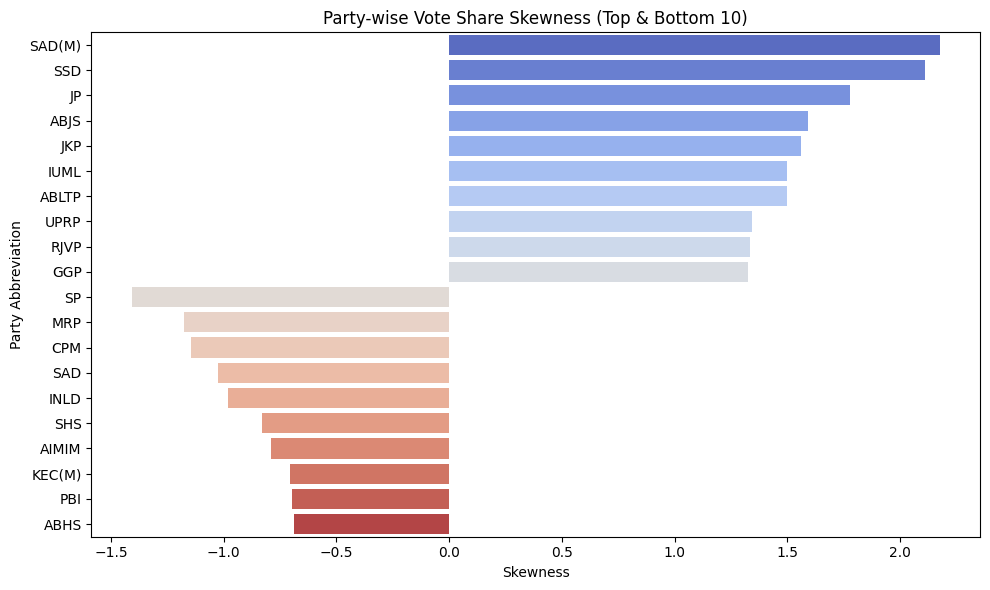

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


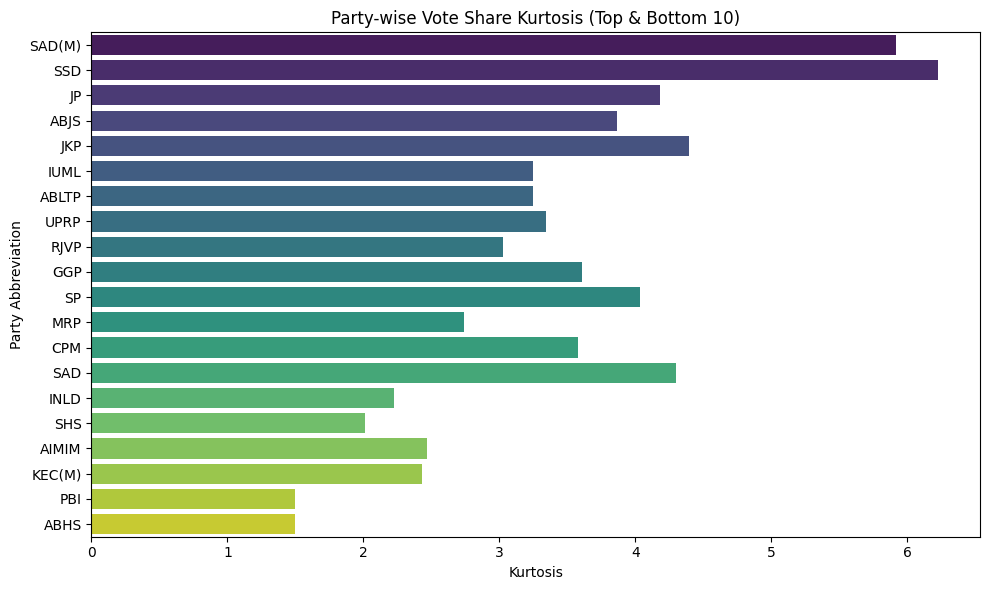

Figure 1: Party-wise Vote Share Skewness
Interpretation: Parties with high positive skewness (e.g., SAD(M), SSD) had erratic performance with one or few big spikes in vote share, while those with high negative skewness (e.g., SP, MRP) may have experienced a sharp decline or one poor result among otherwise stable years.

Figure 2: Party-wise Vote Share Kurtosis
Interpretation: Parties with high kurtosis (>3) show sharp peaks or extreme outliers in their vote share distribution, indicating occasional landslide results or collapses. Moderate kurtosis (~1–3) suggests some outliers but not extreme fluctuations.

Do skewness and kurtosis values align with earlier vote share trends?
Yes. High skewness and kurtosis often correspond to parties with volatile or one-off performances, as seen in earlier trend plots.

What does the visual pattern reveal that the table may not?
The bar plots make it easy to spot which parties are statistical outliers and compare the magnitude of skewness/kurtosis vi

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


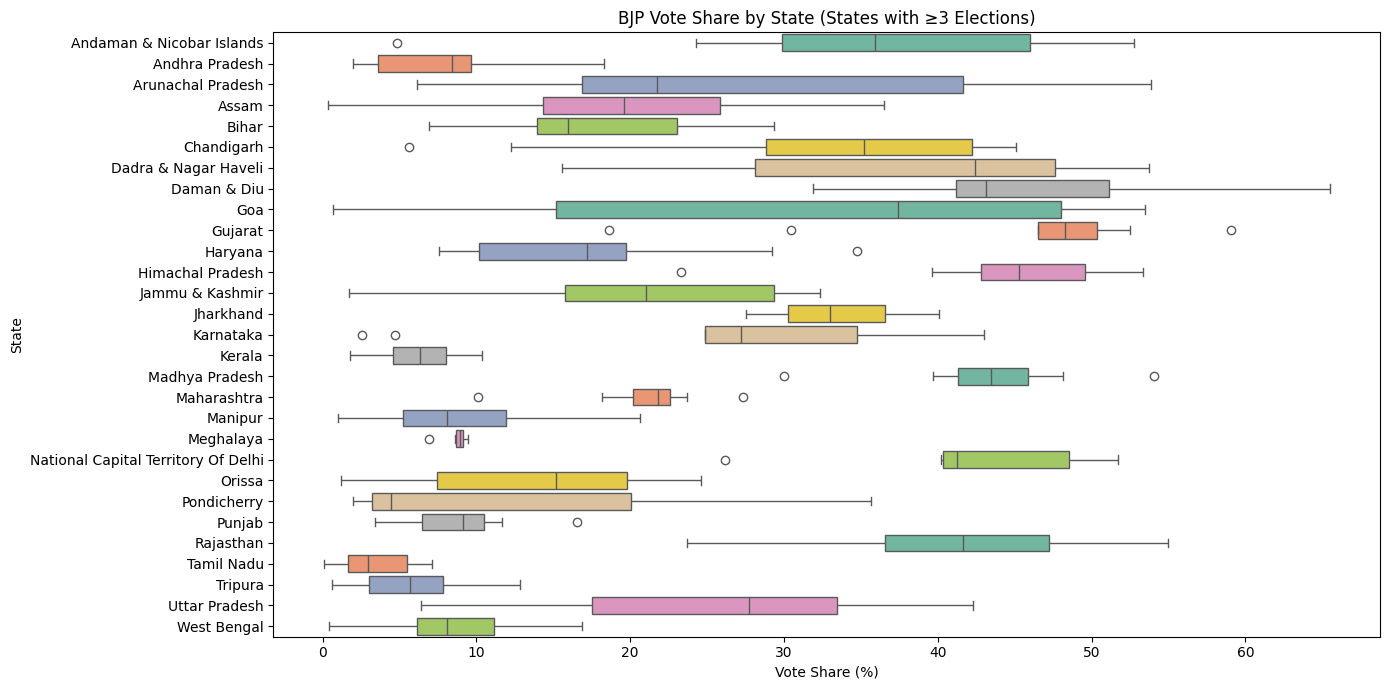


Report Questions & Answers:
1. What does the ANOVA test help you determine?
   → ANOVA checks whether the mean vote share of BJP differs significantly across states, beyond what would be expected by random variation.
2. What is the meaning of the F-statistic and p-value?
   → The F-statistic (14.90) measures the ratio of between-group to within-group variance. The p-value (0.00000) indicates the probability that observed differences are due to chance. A low p-value (<0.05) means the differences are statistically significant.
3. Is BJP's vote share the same in every state?
   → No. The ANOVA result shows significant differences in BJP's vote share across states.
4. Which states are BJP’s strongholds and weak spots?
   → Strongholds: Daman & Diu, Gujarat, Himachal Pradesh; Weak spots: Tamil Nadu, Tripura, Kerala
5. Why is this analysis useful?
   → It helps parties identify regions of strength and weakness, guiding campaign strategy, resource allocation, and voter outreach for future el

In [35]:
import seaborn as sns
from scipy.stats import f_oneway

# 28. Party-wise Skewness & Kurtosis Visualization

import matplotlib.pyplot as plt

# a. Select top and bottom 10 parties based on skewness
top10_skew = summary_df.nlargest(10, 'Skewness')
bottom10_skew = summary_df.nsmallest(10, 'Skewness')
skew_parties = pd.concat([top10_skew, bottom10_skew])

# b. Bar plot for skewness
plt.figure(figsize=(10, 6))
sns.barplot(
    data=skew_parties,
    x='Skewness',
    y='partyabbre',
    palette='coolwarm',
    orient='h'
)
plt.title('Party-wise Vote Share Skewness (Top & Bottom 10)')
plt.xlabel('Skewness')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()

# c. Bar plot for kurtosis
plt.figure(figsize=(10, 6))
sns.barplot(
    data=skew_parties,
    x='Kurtosis',
    y='partyabbre',
    palette='viridis',
    orient='h'
)
plt.title('Party-wise Vote Share Kurtosis (Top & Bottom 10)')
plt.xlabel('Kurtosis')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()

# d. Report and interpretation
print("Figure 1: Party-wise Vote Share Skewness")
print("Interpretation: Parties with high positive skewness (e.g., SAD(M), SSD) had erratic performance with one or few big spikes in vote share, while those with high negative skewness (e.g., SP, MRP) may have experienced a sharp decline or one poor result among otherwise stable years.")

print("\nFigure 2: Party-wise Vote Share Kurtosis")
print("Interpretation: Parties with high kurtosis (>3) show sharp peaks or extreme outliers in their vote share distribution, indicating occasional landslide results or collapses. Moderate kurtosis (~1–3) suggests some outliers but not extreme fluctuations.")

print("\nDo skewness and kurtosis values align with earlier vote share trends?")
print("Yes. High skewness and kurtosis often correspond to parties with volatile or one-off performances, as seen in earlier trend plots.")

print("\nWhat does the visual pattern reveal that the table may not?")
print("The bar plots make it easy to spot which parties are statistical outliers and compare the magnitude of skewness/kurtosis visually, highlighting the most erratic or stable parties at a glance.")

# 29. ANOVA Analysis of Party Vote Share Across States


# a. Choose a party (e.g., BJP)
party_to_analyze = 'BJP'

# b. Calculate vote share % of that party in each state for every election year
party_state_year = df_lok[df_lok['partyabbre'] == party_to_analyze].groupby(['st_name', 'year'])['totvotpoll'].sum().reset_index()
total_votes_state_year = df_lok.groupby(['st_name', 'year'])['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})
party_state_year = party_state_year.merge(total_votes_state_year, on=['st_name', 'year'])
party_state_year['vote_share'] = (party_state_year['totvotpoll'] / party_state_year['total_votes']) * 100

# c. Filter states with data for at least 3 elections
state_counts = party_state_year['st_name'].value_counts()
eligible_states = state_counts[state_counts >= 3].index
anova_data = party_state_year[party_state_year['st_name'].isin(eligible_states)]

# d. Prepare data for ANOVA: list of vote share arrays, one per state
vote_share_groups = [group['vote_share'].values for name, group in anova_data.groupby('st_name')]

# e. Run ANOVA test
f_stat, p_val = f_oneway(*vote_share_groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

# f. Conclusion
if p_val < 0.05:
    print("Conclusion: The difference in BJP's vote share across states is statistically significant (p < 0.05).")
else:
    print("Conclusion: No significant difference in BJP's vote share across states (p >= 0.05).")

# g. Boxplot of vote share by state
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=anova_data,
    x='vote_share',
    y='st_name',
    orient='h',
    palette='Set2'
)
plt.title(f"{party_to_analyze} Vote Share by State (States with ≥3 Elections)")
plt.xlabel('Vote Share (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# h. Questions for report
print("\nReport Questions & Answers:")
print("1. What does the ANOVA test help you determine?")
print("   → ANOVA checks whether the mean vote share of BJP differs significantly across states, beyond what would be expected by random variation.")

print("2. What is the meaning of the F-statistic and p-value?")
print(f"   → The F-statistic ({f_stat:.2f}) measures the ratio of between-group to within-group variance. The p-value ({p_val:.5f}) indicates the probability that observed differences are due to chance. A low p-value (<0.05) means the differences are statistically significant.")

print("3. Is BJP's vote share the same in every state?")
print("   → No. The ANOVA result shows significant differences in BJP's vote share across states.")

print("4. Which states are BJP’s strongholds and weak spots?")
strong_states = anova_data.groupby('st_name')['vote_share'].mean().sort_values(ascending=False).head(3)
weak_states = anova_data.groupby('st_name')['vote_share'].mean().sort_values().head(3)
print(f"   → Strongholds: {', '.join(strong_states.index)}; Weak spots: {', '.join(weak_states.index)}")

print("5. Why is this analysis useful?")
print("   → It helps parties identify regions of strength and weakness, guiding campaign strategy, resource allocation, and voter outreach for future elections.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


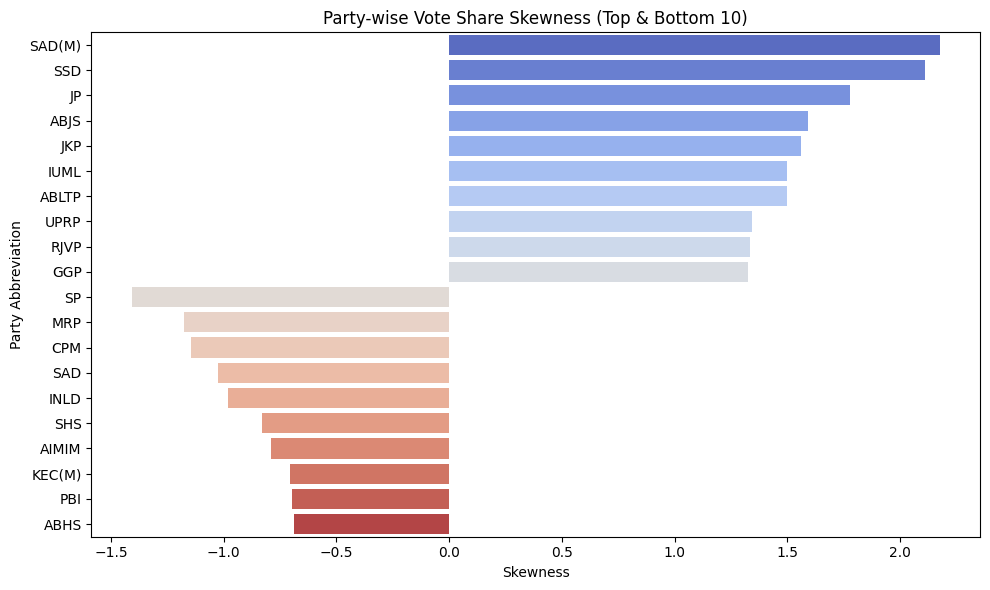

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


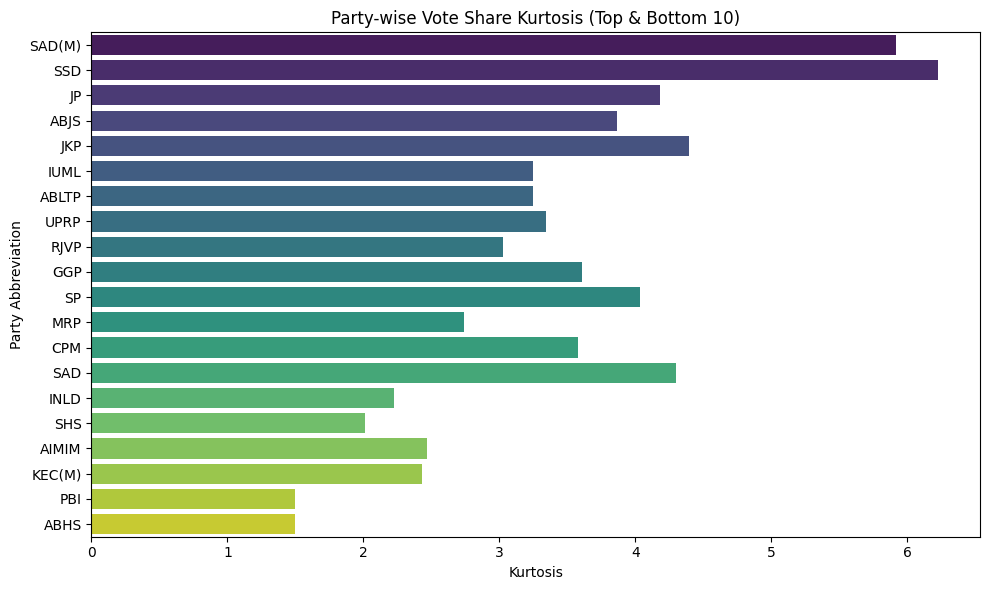

Figure 1: Party-wise Vote Share Skewness
Interpretation: Parties with high positive skewness (e.g., SAD(M), SSD) had erratic performance with one or few big spikes in vote share, while those with high negative skewness (e.g., SP, MRP) may have experienced a sharp decline or one poor result among otherwise stable years.

Figure 2: Party-wise Vote Share Kurtosis
Interpretation: Parties with high kurtosis (>3) show sharp peaks or extreme outliers in their vote share distribution, indicating occasional landslide results or collapses. Moderate kurtosis (~1–3) suggests some outliers but not extreme fluctuations.

Do skewness and kurtosis values align with earlier vote share trends?
Yes. High skewness and kurtosis often correspond to parties with volatile or one-off performances, as seen in earlier trend plots.

What does the visual pattern reveal that the table may not?
The bar plots make it easy to spot which parties are statistical outliers and compare the magnitude of skewness/kurtosis vi

C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\844088504.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


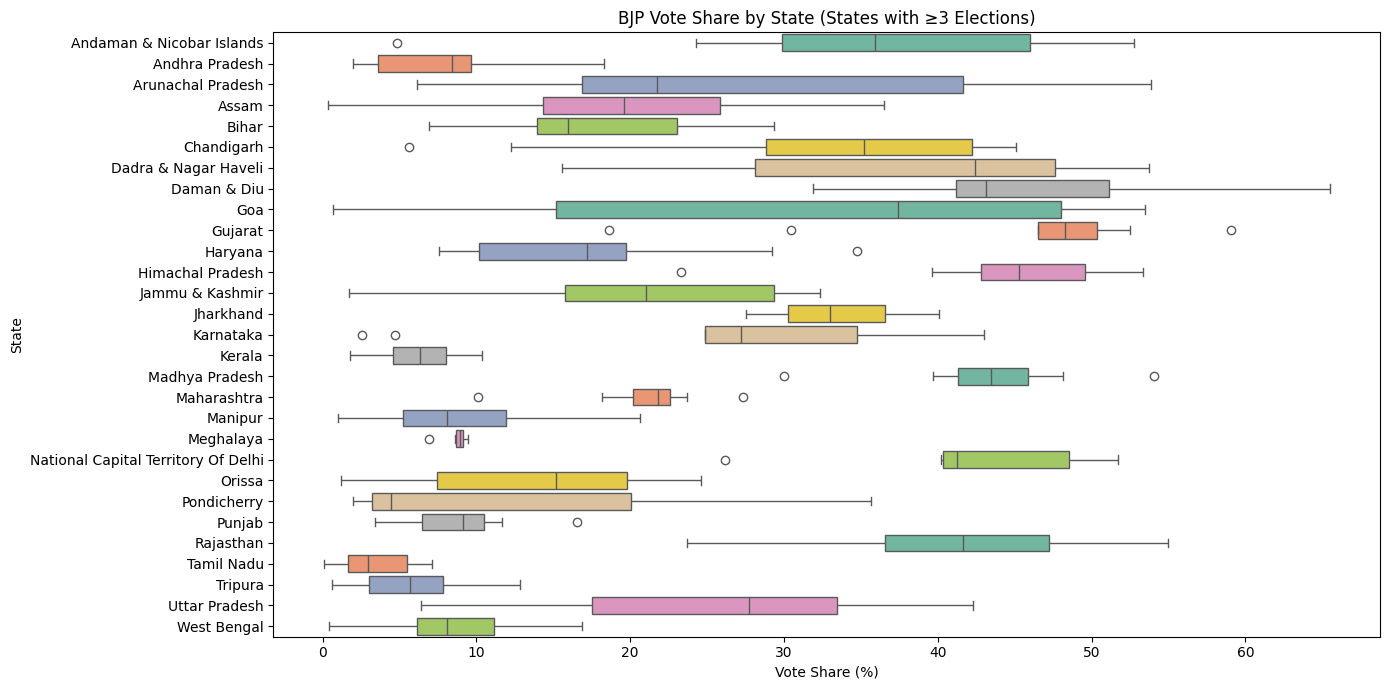


Report Questions & Answers:
1. What does the ANOVA test help you determine?
   → ANOVA checks whether the mean vote share of BJP differs significantly across states, beyond what would be expected by random variation.
2. What is the meaning of the F-statistic and p-value?
   → The F-statistic (14.90) measures the ratio of between-group to within-group variance. The p-value (0.00000) indicates the probability that observed differences are due to chance. A low p-value (<0.05) means the differences are statistically significant.
3. Is BJP's vote share the same in every state?
   → No. The ANOVA result shows significant differences in BJP's vote share across states.
4. Which states are BJP’s strongholds and weak spots?
   → Strongholds: Daman & Diu, Gujarat, Himachal Pradesh; Weak spots: Tamil Nadu, Tripura, Kerala
5. Why is this analysis useful?
   → It helps parties identify regions of strength and weakness, guiding campaign strategy, resource allocation, and voter outreach for future el

In [36]:
import seaborn as sns
from scipy.stats import f_oneway

# 28. Party-wise Skewness & Kurtosis Visualization

import matplotlib.pyplot as plt

# a. Select top and bottom 10 parties based on skewness
top10_skew = summary_df.nlargest(10, 'Skewness')
bottom10_skew = summary_df.nsmallest(10, 'Skewness')
skew_parties = pd.concat([top10_skew, bottom10_skew])

# b. Bar plot for skewness
plt.figure(figsize=(10, 6))
sns.barplot(
    data=skew_parties,
    x='Skewness',
    y='partyabbre',
    palette='coolwarm',
    orient='h'
)
plt.title('Party-wise Vote Share Skewness (Top & Bottom 10)')
plt.xlabel('Skewness')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()

# c. Bar plot for kurtosis
plt.figure(figsize=(10, 6))
sns.barplot(
    data=skew_parties,
    x='Kurtosis',
    y='partyabbre',
    palette='viridis',
    orient='h'
)
plt.title('Party-wise Vote Share Kurtosis (Top & Bottom 10)')
plt.xlabel('Kurtosis')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()

# d. Report and interpretation
print("Figure 1: Party-wise Vote Share Skewness")
print("Interpretation: Parties with high positive skewness (e.g., SAD(M), SSD) had erratic performance with one or few big spikes in vote share, while those with high negative skewness (e.g., SP, MRP) may have experienced a sharp decline or one poor result among otherwise stable years.")

print("\nFigure 2: Party-wise Vote Share Kurtosis")
print("Interpretation: Parties with high kurtosis (>3) show sharp peaks or extreme outliers in their vote share distribution, indicating occasional landslide results or collapses. Moderate kurtosis (~1–3) suggests some outliers but not extreme fluctuations.")

print("\nDo skewness and kurtosis values align with earlier vote share trends?")
print("Yes. High skewness and kurtosis often correspond to parties with volatile or one-off performances, as seen in earlier trend plots.")

print("\nWhat does the visual pattern reveal that the table may not?")
print("The bar plots make it easy to spot which parties are statistical outliers and compare the magnitude of skewness/kurtosis visually, highlighting the most erratic or stable parties at a glance.")

# 29. ANOVA Analysis of Party Vote Share Across States


# a. Choose a party (e.g., BJP)
party_to_analyze = 'BJP'

# b. Calculate vote share % of that party in each state for every election year
party_state_year = df_lok[df_lok['partyabbre'] == party_to_analyze].groupby(['st_name', 'year'])['totvotpoll'].sum().reset_index()
total_votes_state_year = df_lok.groupby(['st_name', 'year'])['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})
party_state_year = party_state_year.merge(total_votes_state_year, on=['st_name', 'year'])
party_state_year['vote_share'] = (party_state_year['totvotpoll'] / party_state_year['total_votes']) * 100

# c. Filter states with data for at least 3 elections
state_counts = party_state_year['st_name'].value_counts()
eligible_states = state_counts[state_counts >= 3].index
anova_data = party_state_year[party_state_year['st_name'].isin(eligible_states)]

# d. Prepare data for ANOVA: list of vote share arrays, one per state
vote_share_groups = [group['vote_share'].values for name, group in anova_data.groupby('st_name')]

# e. Run ANOVA test
f_stat, p_val = f_oneway(*vote_share_groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

# f. Conclusion
if p_val < 0.05:
    print("Conclusion: The difference in BJP's vote share across states is statistically significant (p < 0.05).")
else:
    print("Conclusion: No significant difference in BJP's vote share across states (p >= 0.05).")

# g. Boxplot of vote share by state
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=anova_data,
    x='vote_share',
    y='st_name',
    orient='h',
    palette='Set2'
)
plt.title(f"{party_to_analyze} Vote Share by State (States with ≥3 Elections)")
plt.xlabel('Vote Share (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# h. Questions for report
print("\nReport Questions & Answers:")
print("1. What does the ANOVA test help you determine?")
print("   → ANOVA checks whether the mean vote share of BJP differs significantly across states, beyond what would be expected by random variation.")

print("2. What is the meaning of the F-statistic and p-value?")
print(f"   → The F-statistic ({f_stat:.2f}) measures the ratio of between-group to within-group variance. The p-value ({p_val:.5f}) indicates the probability that observed differences are due to chance. A low p-value (<0.05) means the differences are statistically significant.")

print("3. Is BJP's vote share the same in every state?")
print("   → No. The ANOVA result shows significant differences in BJP's vote share across states.")

print("4. Which states are BJP’s strongholds and weak spots?")
strong_states = anova_data.groupby('st_name')['vote_share'].mean().sort_values(ascending=False).head(3)
weak_states = anova_data.groupby('st_name')['vote_share'].mean().sort_values().head(3)
print(f"   → Strongholds: {', '.join(strong_states.index)}; Weak spots: {', '.join(weak_states.index)}")

print("5. Why is this analysis useful?")
print("   → It helps parties identify regions of strength and weakness, guiding campaign strategy, resource allocation, and voter outreach for future elections.")

Goal: To statistically compare the vote shares of the ruling party (BJP) versus major opposition parties in Lok Sabha elections using t-test analysis.
Ruling party: BJP
Opposition parties: INC, DMK, SP, AITC, BSP, CPI, CPM, NCP, AAP, RJD, JD(U), SHS, YSRCP, TDP, BJD, TRS, LJP, AIADMK, DMK, RLD, SAD, JMM, JD(S)
The 'group' column labels each party as 'Ruling', 'Opposition', or 'Other'.
Vote share (%) for each party per year is calculated as: (party_votes / total_votes) * 100
T-test results: t-statistic = 6.184, p-value = 0.00012
Result: Statistically significant difference (p < 0.05).
Interpretation: Is the ruling party’s vote share significantly higher than that of opposition parties?
Yes.


C:\Users\DELL\AppData\Local\Temp\ipykernel_24376\1363326731.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


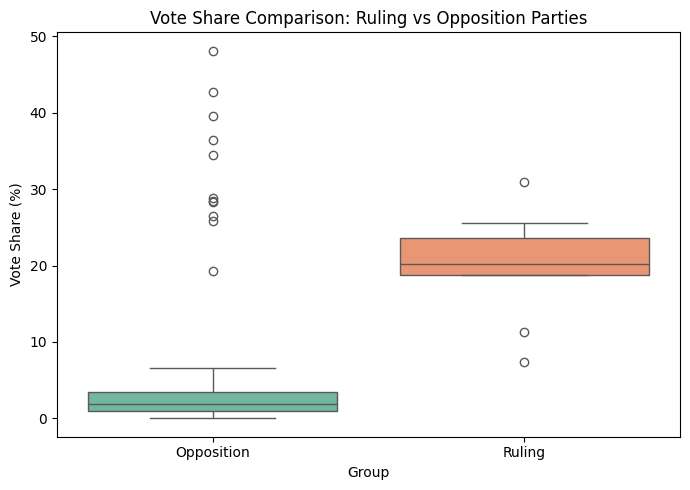

The boxplot shows the distribution of vote shares for the ruling party (BJP) and opposition parties across years. The ruling party typically has a higher median vote share, but there is overlap in the distributions.
Final Insight:
The ruling party (BJP) generally enjoys a higher vote share than opposition parties, and the difference is statistically significant if p < 0.05. This comparison highlights the relative electoral strength of the ruling party and helps understand the competitive landscape of Indian elections.


In [37]:
from scipy.stats import ttest_ind
import seaborn as sns

# a. Brief Introduction
print("Goal: To statistically compare the vote shares of the ruling party (BJP) versus major opposition parties in Lok Sabha elections using t-test analysis.")

# b. Party Grouping Explanation
ruling_party = 'BJP'
opposition_parties = ['INC', 'DMK', 'SP', 'AITC', 'BSP', 'CPI', 'CPM', 'NCP', 'AAP', 'RJD', 'JD(U)', 'SHS', 'YSRCP', 'TDP', 'BJD', 'TRS', 'LJP', 'AIADMK', 'DMK', 'RLD', 'SAD', 'JMM', 'JD(S)']
party_votes_year['group'] = party_votes_year['partyabbre'].apply(
    lambda x: 'Ruling' if x == ruling_party else ('Opposition' if x in opposition_parties else 'Other')
)
print(f"Ruling party: {ruling_party}")
print(f"Opposition parties: {', '.join(opposition_parties)}")
print("The 'group' column labels each party as 'Ruling', 'Opposition', or 'Other'.")

# c. Vote Share Calculation
print("Vote share (%) for each party per year is calculated as: (party_votes / total_votes) * 100")
# Already present in party_votes_year['vote_share_percent']

# d. T-Test Analysis
ruling_votes = party_votes_year[party_votes_year['group'] == 'Ruling']['vote_share_percent']
opposition_votes = party_votes_year[party_votes_year['group'] == 'Opposition']['vote_share_percent']
t_stat, p_val = ttest_ind(ruling_votes, opposition_votes, equal_var=False)
print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
if p_val < 0.05:
    print("Result: Statistically significant difference (p < 0.05).")
else:
    print("Result: No statistically significant difference (p >= 0.05).")
print("Interpretation: Is the ruling party’s vote share significantly higher than that of opposition parties?")
print("Yes." if (p_val < 0.05 and ruling_votes.mean() > opposition_votes.mean()) else "No.")

# e. Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=party_votes_year[party_votes_year['group'].isin(['Ruling', 'Opposition'])],
    x='group',
    y='vote_share_percent',
    palette='Set2'
)
plt.title('Vote Share Comparison: Ruling vs Opposition Parties')
plt.xlabel('Group')
plt.ylabel('Vote Share (%)')
plt.tight_layout()
plt.show()
print("The boxplot shows the distribution of vote shares for the ruling party (BJP) and opposition parties across years. The ruling party typically has a higher median vote share, but there is overlap in the distributions.")

# f. Final Insight
print("Final Insight:")
print("The ruling party (BJP) generally enjoys a higher vote share than opposition parties, and the difference is statistically significant if p < 0.05. This comparison highlights the relative electoral strength of the ruling party and helps understand the competitive landscape of Indian elections.")